# ElasticSearch

* Literature: <https://www.elastic.co/guide/en/elasticsearch/guide/current/index.html>
* In this notebook we follow the steps in this guide
* Java JDK 8 is strongly recommended, so you may need to upgrade your Java
    (on my mac with java 1.6 elasticsearch did not work)

In [1]:
! java -version

java version "1.8.0_191"
Java(TM) SE Runtime Environment (build 1.8.0_191-b12)
Java HotSpot(TM) Server VM (build 25.191-b12, mixed mode)


In [2]:
# download elastic search
# https://www.elastic.co/guide/en/elasticsearch/guide/current/_installing_elasticsearch.html

! curl -L -O https://download.elastic.co/elasticsearch/elasticsearch/elasticsearch-1.7.1.zip
! unzip    elasticsearch-1.7.1.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.3M  100 30.3M    0     0  8143k      0  0:00:03  0:00:03 --:--:-- 8170k
Archive:  elasticsearch-1.7.1.zip
   creating: elasticsearch-1.7.1/
   creating: elasticsearch-1.7.1/config/
  inflating: elasticsearch-1.7.1/config/elasticsearch.yml  
  inflating: elasticsearch-1.7.1/config/logging.yml  
   creating: elasticsearch-1.7.1/bin/
  inflating: elasticsearch-1.7.1/bin/plugin.bat  
  inflating: elasticsearch-1.7.1/bin/elasticsearch.in.bat  
  inflating: elasticsearch-1.7.1/bin/elasticsearch.bat  
  inflating: elasticsearch-1.7.1/bin/service.bat  
  inflating: elasticsearch-1.7.1/bin/elasticsearch-service-x64.exe  
  inflating: elasticsearch-1.7.1/bin/elasticsearch-service-mgr.exe  
  inflating: elasticsearch-1.7.1/bin/elasticsearch-service-x86.exe  
  inflating: elasticsearch-1.7.1/bin/elasticsearch  
  inflating: elasticsear

In [3]:
! rm elasticsearch-1.7.1.zip
% cd elasticsearch-1.7.1
!ls -l

/home/student/Documents/Zoekmachines/elasticsearch-1.7.1
total 40
drwxr-xr-x 2 student student  4096 Jul 29  2015 bin
drwxr-xr-x 2 student student  4096 Jul 29  2015 config
drwxr-xr-x 3 student student  4096 Jul 29  2015 lib
-rw-rw-r-- 1 student student 11358 Mar 23  2015 LICENSE.txt
-rw-rw-r-- 1 student student   150 Jun  9  2015 NOTICE.txt
-rw-rw-r-- 1 student student  8700 Jun  9  2015 README.textile


In [4]:
# installing marvel
! ./bin/plugin -i elasticsearch/marvel/latest
! echo 'marvel.agent.enabled: false' >> ./config/elasticsearch.yml

-> Installing elasticsearch/marvel/latest...
Trying http://download.elasticsearch.org/elasticsearch/marvel/marvel-latest.zip...
Installed elasticsearch/marvel/latest into /home/student/Documents/Zoekmachines/elasticsearch-1.7.1/plugins/marvel


In [6]:
# running eleastic search
# https://www.elastic.co/guide/en/elasticsearch/guide/current/running-elasticsearch.html
# In a notebook you should add the -d option otherwise you cannot run other cells

!./bin/elasticsearch -d

/bin/sh: 1: ./bin/elasticsearch: not found


In [7]:
!curl 'http://localhost:9200/?pretty'

{
  "status" : 200,
  "name" : "Deadpool",
  "cluster_name" : "elasticsearch",
  "version" : {
    "number" : "1.7.1",
    "build_hash" : "b88f43fc40b0bcd7f173a1f9ee2e97816de80b19",
    "build_timestamp" : "2015-07-29T09:54:16Z",
    "build_snapshot" : false,
    "lucene_version" : "4.10.4"
  },
  "tagline" : "You Know, for Search"
}


## Shutting down
* <https://www.elastic.co/guide/en/elasticsearch/reference/current/cluster-nodes-shutdown.html>

In [8]:
!  curl -XPOST 'http://localhost:9200/_shutdown'

{"cluster_name":"elasticsearch","nodes":{"CFuL8EWIRauiukgB9jwa5Q":{"name":"Anti-Cap"},"MQ_TXRkcSzCJUa811l16-g":{"name":"Gloom"}}}

In [9]:
# Check whether it worked
!curl 'http://localhost:9200/?pretty'

curl: (7) Failed to connect to localhost port 9200: Connection refused


# We start elastic search again
* Now just follow the guide and learn
* Instead of using the sense plugin or curl, you can talk to elastic search using the python API

In [20]:
!./bin/elasticsearch -d

# Using the Python elastic search api

* Documentation: <https://elasticsearch-py.readthedocs.org/en/master/>

In [8]:
import sys
import json
from elasticsearch import Elasticsearch

HOST = 'http://localhost:9200/'
es = Elasticsearch(hosts=[HOST])


query={
  "query": {
    "match_all": {}
  }
}

es.search(body=query)

{'_shards': {'failed': 0, 'successful': 10, 'total': 10},
 'hits': {'hits': [{'_id': '59',
    '_index': 'kamervragen',
    '_score': 1.0,
    '_source': {'Afkomstig van': '2989918290',
     'Bestand': '17Kb',
     'Bibliografische_omschrijving': 'Vragen van het lid Kant aan de minister van Volksgezondheid, Welzijn en Sport over foliumzuur. (Ingezonden 14 september 1999); Antwoord',
     'Datum_indiening': '1999-10-21',
     'Datum_reaktie': '\n',
     'Indiener': 'Volksgezondheid, Welzijn en Sport',
     'Inhoud': 'Vragen over het plaatsen van foliumzuur op de lijst van zelfzorgmiddelen die niet meer automatisch worden vergoed en het mogelijke gevolg hiervan dat vooral vrouwen met een lage sociaal-economische status geen foliumzuur meer zullen gaan slikken. Deze vragen dienen ter aanvulling op eerdere vragen van het lid Hermann, ingezonden 9 september 1999 (2989918080).',
     'Partij vertegenwoordiger': '<persoon partij="SP">Kant</persoon>',
     'Permalink': '\nhttp://www.geencommen

In [15]:
# The example from https://www.elastic.co/guide/en/elasticsearch/guide/current/_talking_to_elasticsearch.html
es.count(body=query)

{'_shards': {'failed': 0, 'successful': 0, 'total': 0}, 'count': 0}

# Putting information in the DB

* We follow <https://www.elastic.co/guide/en/elasticsearch/guide/current/_indexing_employee_documents.html>

* Notice that the path /megacorp/employee/1 contains three pieces of information:
    * megacorp: The index name
    * employee: The type name
    * 1 : The ID of this particular employee
    
* We use the `es.index` method 

In [ ]:
from collections import Counter,defaultdict
from bs4 import BeautifulSoup
import os
import glob
import nltk
import math
from __future__ import division


#This handles all xml files and creates json files with the necessary information
counter = 0
for file in os.listdir():
    counter = counter + 1
    #write_file = open("data_file"+str(counter)+".json", "w")
    filename = os.fsdecode(file)
    if filename.endswith(".xml"):
        file = open(filename, 'r')
        print(counter)
        try:
            soup = BeautifulSoup(file, 'lxml')
            info = soup.findAll('item')
            vraagen = soup.findAll('vraag')
            print(vraagen)
            antwoorden = soup.findAll('antwoord')
            antwoorden = str(antwoorden)
            antwoorden = re.sub('<[^>]+>', '', antwoorden)
            data_list = []
            for item in info:
                for word in item:
                    data_list.append(word)
            data_list.remove('\n')
            data = {}
            data ={
                "Document ID " + data_list[len(data_list)-2]:{
                    "Bibliografische_omschrijving" : str(data_list[0]),
                    "Bestand":str(data_list[1]),
                    "Permalink":str(data_list[2]),
                    "Inhoud":str(data_list[3]),
                    "Rubriek":str(data_list[4]),
                    "Trefwoorden": str(data_list[5]),
                    "Vindplaats" : str(data_list[6]),
                    "Afkomstig van":str(data_list[7]),
                    "Indiener":str(data_list[8]),
                    "Partij vertegenwoordiger":str(data_list[9]),
                    "Datum_reaktie":str(data_list[10]),
                    "Datum_indiening": str(data_list[11])
                }
            }
            vraag_lijst = []
            for tag in vraagen:
                for vraag in tag:
                    vraag_lijst.append(vraag)
            print(vraag_lijst)
            for i in range(len(vraag_lijst)):
                data["Document ID " + data_list[len(data_list)-2]]['vraag '+str(i+1)] = vraag_lijst[i]
            antwoord_lijst = []
            antwoorden = antwoorden.split('. , ')
            for antwoord in antwoorden:
                antwoord_lijst.append(antwoord)
            for j in range(len(antwoord_lijst)):
                data["Document ID " + data_list[len(data_list)-2]]['antwoord '+str(j+1)] = antwoord_lijst[j]
            #json.dump(data, write_file)
            file.close()
            write_file.close()
        except:
            "This file is faulty"

1
[<vraag nummer="1">Hoe beoordeelt u de huidige verslechterende mensenrechten in Papua? Welke maatregelen stelt u voor in bilateraal, EU en VN-verband? </vraag>, <vraag nummer="2">Hoe beoordeelt u de autonomie-voorstellen van de Universiteit van Papua en de (afhoudende) reactie van Djakarta hierop? Hoe kan een effectieve dialoog van buitenaf gestimuleerd worden zodat mensenrechtenschendingen worden voorkomen? </vraag>, <vraag nummer="3">Welke programma’s zijn nodig om de AIDS-epidemie in Papua te bestrijden? Welke rol kan Ontwikkelingssamenwerking hierbij spelen? </vraag>, <vraag nummer="4" voetnoot="1">Heeft u kennisgenomen van de berichtgeving over het conflict in Wasior (Manokwari, Papua) tussen de lokale bewoners en een houtkapmaatschappij, en de aanval van Brimob-politie op 22 mannen uit Nabire waarbij vier (wellicht zes) doden vielen? <voetnoot nummer="1"></voetnoot>Bent u tevens op de hoogte van de operatie «Comb and destroy», die vanaf eind mei jl. daar gaande is? Hoe beoordee

In [21]:
import json
from pprint import pprint
counter = 0
#This function loads in all the json files
#Insert your directory below:
d = path.dirname(file) if "file" in locals() else os.getcwd() 

#text = open(path.join(d, 'KVR/data')).read()
files_dir = path.join(d, 'elasticsearch-1.7.1/KVR/data')
#files_dir = "/home/student/Documents/Zoekmachines/elasticsearch-1.7.1/KVR/data"
for f in os.listdir(files_dir):
    if f.endswith(".json"):
        print(f)
        cur_filename = os.path.join(files_dir, f)
        file = open(cur_filename)
        counter += 1
        data = json.loads(file.read())
        try:
            es.index(index='kamervragen', doc_type='kamervraag', id=counter, body=data)
        except:
            print("failed")
            
#es.index(index='megacorp', doc_type='employee', id=3, body=employee3)
#es.index(index='kamervragen', doc_type='kamervraag', id=1, body=data)

data_file1305.json


PUT http://localhost:9200/kamervragen/kamervraag/1 [status:400 request:0.036s]


failed
data_file1621.json
data_file1520.json
data_file760.json


PUT http://localhost:9200/kamervragen/kamervraag/10 [status:400 request:0.008s]


data_file2645.json
data_file1708.json
data_file2814.json
data_file1602.json
data_file573.json
data_file2314.json
failed
data_file494.json
data_file1159.json
data_file2176.json
data_file2478.json
data_file2008.json


PUT http://localhost:9200/kamervragen/kamervraag/18 [status:400 request:0.023s]
PUT http://localhost:9200/kamervragen/kamervraag/19 [status:400 request:0.010s]


data_file1338.json
data_file2474.json
data_file1340.json
failed
data_file2769.json
failed
data_file2520.json
data_file1237.json
data_file621.json


PUT http://localhost:9200/kamervragen/kamervraag/22 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/26 [status:400 request:0.003s]


failed
data_file1405.json
data_file1132.json
data_file926.json
data_file2986.json
failed
data_file1227.json
data_file1839.json


PUT http://localhost:9200/kamervragen/kamervraag/35 [status:400 request:0.003s]


data_file339.json
data_file2835.json
data_file1932.json
data_file329.json
data_file1462.json
data_file2095.json
data_file527.json
failed
data_file2546.json


PUT http://localhost:9200/kamervragen/kamervraag/36 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/38 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/43 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/44 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/45 [status:400 request:0.008s]


failed
data_file1735.json
data_file2120.json
failed
data_file2032.json
data_file322.json
data_file343.json
data_file2264.json
data_file595.json
failed
data_file631.json
failed
data_file1195.json
failed
data_file1093.json
data_file64.json

PUT http://localhost:9200/kamervragen/kamervraag/49 [status:400 request:0.019s]



data_file1730.json
data_file1488.json
failed
data_file2535.json
data_file1007.json
data_file1449.json
data_file2343.json


PUT http://localhost:9200/kamervragen/kamervraag/57 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/59 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/62 [status:400 request:0.019s]


data_file550.json
data_file1766.json
data_file144.json
data_file424.json
failed
data_file2486.json
data_file349.json
failed
data_file1849.json
data_file2635.json
data_file1671.json
failed
data_file374.json


PUT http://localhost:9200/kamervragen/kamervraag/63 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/65 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/70 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/72 [status:400 request:0.002s]


failed
data_file415.json
data_file1723.json
failed
data_file1519.json
data_file2627.json
data_file2776.json
data_file1572.json
data_file483.json
failed
data_file1402.json
data_file2050.json
failed
data_file2975.json


PUT http://localhost:9200/kamervragen/kamervraag/77 [status:400 request:0.003s]


data_file59.json
data_file416.json
data_file1459.json
data_file1429.json
failed
data_file384.json
data_file16.json
data_file1871.json


PUT http://localhost:9200/kamervragen/kamervraag/81 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/84 [status:400 request:0.005s]


data_file1725.json
failed
data_file2742.json
data_file1643.json
data_file153.json
failed
data_file1467.json


PUT http://localhost:9200/kamervragen/kamervraag/86 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/88 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/90 [status:400 request:0.028s]
PUT http://localhost:9200/kamervragen/kamervraag/91 [status:400 request:0.027s]


data_file1136.json
failed
data_file2610.json
data_file326.json
failed
data_file2718.json
data_file665.json
failed
data_file2501.json
failed
data_file627.json
data_file1906.json
data_file460.json
data_file1963.json


PUT http://localhost:9200/kamervragen/kamervraag/95 [status:400 request:0.019s]
PUT http://localhost:9200/kamervragen/kamervraag/97 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/98 [status:400 request:0.038s]


failed
data_file718.json
data_file683.json
failed
data_file128.json
failed
data_file1533.json


PUT http://localhost:9200/kamervragen/kamervraag/100 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/102 [status:400 request:0.017s]
PUT http://localhost:9200/kamervragen/kamervraag/103 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/104 [status:400 request:0.019s]


data_file1479.json
failed
data_file1238.json
data_file2302.json
failed
data_file439.json
failed
data_file2694.json
failed
data_file1204.json


PUT http://localhost:9200/kamervragen/kamervraag/105 [status:400 request:0.102s]
PUT http://localhost:9200/kamervragen/kamervraag/106 [status:400 request:0.019s]
PUT http://localhost:9200/kamervragen/kamervraag/107 [status:400 request:0.112s]


failed
data_file921.json
failed
data_file2421.json
failed
data_file1887.json


PUT http://localhost:9200/kamervragen/kamervraag/110 [status:400 request:0.060s]
PUT http://localhost:9200/kamervragen/kamervraag/111 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/112 [status:400 request:0.022s]
PUT http://localhost:9200/kamervragen/kamervraag/113 [status:400 request:0.009s]


data_file242.json
data_file2465.json
failed
data_file1332.json
failed
data_file896.json
failed
data_file2537.json
failed
data_file29.json


PUT http://localhost:9200/kamervragen/kamervraag/116 [status:400 request:0.015s]


data_file1644.json
data_file2659.json
failed
data_file611.json
data_file2653.json
data_file1617.json
data_file2443.json
data_file1812.json
data_file1931.json
data_file434.json
data_file810.json


PUT http://localhost:9200/kamervragen/kamervraag/129 [status:400 request:0.002s]


data_file2475.json
data_file1330.json
data_file1385.json
data_file600.json
data_file1120.json
failed
data_file2476.json
data_file1431.json
data_file336.json
data_file2973.json
data_file1618.json
data_file567.json
data_file1496.json


PUT http://localhost:9200/kamervragen/kamervraag/137 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/138 [status:400 request:0.042s]


data_file863.json
failed
data_file2218.json
failed
data_file1981.json
data_file1404.json
data_file1016.json


PUT http://localhost:9200/kamervragen/kamervraag/141 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/142 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/143 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/145 [status:400 request:0.072s]


failed
data_file2425.json
failed
data_file777.json
failed
data_file1819.json
data_file189.json
failed
data_file664.json
data_file717.json
data_file1328.json
data_file962.json
data_file794.json
data_file472.json
data_file512.json
data_file990.json
data_file1599.json
data_file1891.json


PUT http://localhost:9200/kamervragen/kamervraag/156 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/160 [status:400 request:0.004s]


data_file742.json
failed
data_file971.json
data_file958.json
data_file1048.json
data_file43.json
failed
data_file2909.json
data_file207.json


PUT http://localhost:9200/kamervragen/kamervraag/162 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/164 [status:400 request:0.021s]


failed
data_file1456.json
data_file2567.json
failed
data_file720.json


PUT http://localhost:9200/kamervragen/kamervraag/165 [status:400 request:0.043s]
PUT http://localhost:9200/kamervragen/kamervraag/166 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/168 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/169 [status:400 request:0.042s]
PUT http://localhost:9200/kamervragen/kamervraag/170 [status:400 request:0.009s]


failed
data_file617.json
failed
data_file955.json
data_file1243.json
failed
data_file1339.json
failed
data_file1266.json
failed
data_file1654.json


PUT http://localhost:9200/kamervragen/kamervraag/172 [status:400 request:0.089s]


data_file2091.json
failed
data_file994.json


PUT http://localhost:9200/kamervragen/kamervraag/173 [status:400 request:0.043s]
PUT http://localhost:9200/kamervragen/kamervraag/174 [status:400 request:0.008s]


failed
data_file503.json
failed
data_file2641.json
data_file1272.json
data_file219.json


PUT http://localhost:9200/kamervragen/kamervraag/178 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/180 [status:400 request:0.002s]


data_file2291.json
failed
data_file438.json
data_file2449.json
failed
data_file1869.json
data_file360.json


PUT http://localhost:9200/kamervragen/kamervraag/183 [status:400 request:0.022s]
PUT http://localhost:9200/kamervragen/kamervraag/184 [status:400 request:0.006s]


data_file2886.json
failed
data_file2382.json
failed
data_file690.json
data_file2083.json


PUT http://localhost:9200/kamervragen/kamervraag/187 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/188 [status:400 request:0.049s]
PUT http://localhost:9200/kamervragen/kamervraag/189 [status:400 request:0.002s]


data_file649.json
failed
data_file2188.json
failed
data_file1910.json
failed
data_file589.json
data_file1106.json
data_file632.json
data_file2446.json


PUT http://localhost:9200/kamervragen/kamervraag/193 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/196 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/198 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/199 [status:400 request:0.009s]


failed
data_file1147.json
data_file66.json
data_file1458.json
failed
data_file652.json
data_file614.json
failed
data_file247.json
failed
data_file852.json


PUT http://localhost:9200/kamervragen/kamervraag/202 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/203 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/205 [status:400 request:0.054s]


data_file2728.json
data_file2372.json
failed
data_file645.json
failed
data_file1770.json
data_file2691.json
failed
data_file2296.json


PUT http://localhost:9200/kamervragen/kamervraag/209 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/210 [status:400 request:0.045s]


data_file2526.json
data_file1262.json
data_file104.json
failed
data_file2879.json
failed
data_file846.json


PUT http://localhost:9200/kamervragen/kamervraag/211 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/212 [status:400 request:0.086s]
PUT http://localhost:9200/kamervragen/kamervraag/214 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/217 [status:400 request:0.003s]


failed
data_file1107.json
failed
data_file1555.json
data_file1354.json
failed
data_file590.json
data_file1133.json
data_file1296.json
failed
data_file2309.json
data_file1244.json
data_file1197.json
data_file2209.json
data_file844.json


PUT http://localhost:9200/kamervragen/kamervraag/222 [status:400 request:0.104s]
PUT http://localhost:9200/kamervragen/kamervraag/224 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/227 [status:400 request:0.015s]


failed
data_file1642.json
data_file950.json
failed
data_file1139.json
data_file1627.json
data_file2518.json
failed
data_file1527.json
data_file2326.json


PUT http://localhost:9200/kamervragen/kamervraag/231 [status:400 request:0.004s]


data_file2663.json
data_file337.json
failed
data_file2887.json
data_file1230.json


PUT http://localhost:9200/kamervragen/kamervraag/234 [status:400 request:0.022s]
PUT http://localhost:9200/kamervragen/kamervraag/235 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/236 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/237 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/238 [status:400 request:0.007s]


data_file1214.json
failed
data_file1413.json
failed
data_file86.json
failed
data_file2052.json
failed
data_file2040.json
failed
data_file47.json
data_file2330.json


PUT http://localhost:9200/kamervragen/kamervraag/243 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/244 [status:400 request:0.037s]


data_file963.json
data_file646.json
data_file2542.json
failed
data_file423.json
failed
data_file2134.json

PUT http://localhost:9200/kamervragen/kamervraag/245 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/246 [status:400 request:0.084s]



failed
data_file2252.json
failed
data_file299.json
data_file1311.json


PUT http://localhost:9200/kamervragen/kamervraag/248 [status:400 request:0.072s]
PUT http://localhost:9200/kamervragen/kamervraag/249 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/252 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/253 [status:400 request:0.013s]


failed
data_file2373.json
failed
data_file1377.json
data_file1909.json
data_file1865.json
failed
data_file1476.json
failed
data_file2194.json
data_file1923.json
data_file2283.json
data_file1258.json


PUT http://localhost:9200/kamervragen/kamervraag/258 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/260 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/261 [status:400 request:0.003s]


data_file1021.json
failed
data_file2454.json
data_file1051.json
failed
data_file732.json
failed
data_file2618.json
data_file705.json
data_file2357.json
data_file1530.json
data_file686.json
data_file1684.json
data_file1856.json
data_file1399.json
data_file1902.json
data_file635.json


PUT http://localhost:9200/kamervragen/kamervraag/275 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/276 [status:400 request:0.005s]


data_file170.json
data_file2727.json
data_file736.json
data_file2017.json
failed
data_file2754.json
failed
data_file1699.json


PUT http://localhost:9200/kamervragen/kamervraag/280 [status:400 request:0.004s]


data_file2144.json
data_file1762.json
data_file211.json
failed
data_file1917.json
data_file997.json


PUT http://localhost:9200/kamervragen/kamervraag/284 [status:400 request:0.031s]
PUT http://localhost:9200/kamervragen/kamervraag/285 [status:400 request:0.021s]


data_file2368.json
data_file1516.json
failed
data_file1828.json
failed
data_file951.json
data_file534.json
data_file1414.json
data_file688.json
data_file1392.json
data_file2110.json
data_file240.json
data_file2805.json


PUT http://localhost:9200/kamervragen/kamervraag/296 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/298 [status:400 request:0.013s]


data_file1773.json
data_file1672.json
data_file1782.json
failed
data_file188.json
data_file1315.json
failed
data_file2433.json


PUT http://localhost:9200/kamervragen/kamervraag/301 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/302 [status:400 request:0.003s]


data_file2684.json
data_file319.json
failed
data_file2175.json
failed
data_file1183.json


PUT http://localhost:9200/kamervragen/kamervraag/304 [status:400 request:0.045s]


data_file2682.json
failed
data_file607.json
data_file1062.json
data_file28.json
data_file1169.json
data_file331.json
data_file58.json


PUT http://localhost:9200/kamervragen/kamervraag/310 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/313 [status:400 request:0.020s]


failed
data_file2366.json
data_file1638.json
data_file2932.json
failed
data_file2890.json


PUT http://localhost:9200/kamervragen/kamervraag/317 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/321 [status:400 request:0.006s]


data_file1327.json
data_file1115.json
data_file2407.json
failed
data_file2143.json
data_file1424.json
data_file2580.json
data_file593.json
failed
data_file1368.json


PUT http://localhost:9200/kamervragen/kamervraag/324 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/325 [status:400 request:0.008s]


data_file2026.json
data_file2686.json
failed
data_file563.json
failed
data_file323.json


PUT http://localhost:9200/kamervragen/kamervraag/328 [status:400 request:0.013s]


data_file2954.json
data_file1736.json
failed
data_file6.json
data_file2966.json
data_file50.json


PUT http://localhost:9200/kamervragen/kamervraag/331 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/332 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/335 [status:400 request:0.099s]


failed
data_file129.json
failed
data_file612.json
data_file1958.json
data_file2908.json
failed
data_file2152.json
data_file2529.json
data_file819.json
data_file602.json
data_file197.json
data_file1170.json
data_file1212.json


PUT http://localhost:9200/kamervragen/kamervraag/342 [status:400 request:0.088s]


failed
data_file1493.json
data_file2999.json
data_file381.json
data_file2497.json


PUT http://localhost:9200/kamervragen/kamervraag/346 [status:400 request:0.030s]
PUT http://localhost:9200/kamervragen/kamervraag/347 [status:400 request:0.009s]


failed
data_file2577.json
failed
data_file1289.json
data_file1517.json
data_file231.json
data_file752.json


PUT http://localhost:9200/kamervragen/kamervraag/352 [status:400 request:0.006s]


data_file1653.json
failed
data_file1971.json
data_file1633.json
data_file1978.json
data_file333.json
data_file2955.json


PUT http://localhost:9200/kamervragen/kamervraag/358 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/362 [status:400 request:0.003s]


data_file673.json
failed
data_file781.json
data_file2167.json
data_file30.json
data_file444.json
failed
data_file2261.json


PUT http://localhost:9200/kamervragen/kamervraag/367 [status:400 request:0.004s]


data_file1067.json
data_file919.json
data_file305.json
data_file1851.json
failed
data_file109.json
data_file942.json
data_file400.json
data_file2611.json
data_file508.json
data_file13.json


PUT http://localhost:9200/kamervragen/kamervraag/375 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/377 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/378 [status:400 request:0.068s]


data_file740.json
data_file1207.json
failed
data_file2411.json
data_file648.json
failed
data_file1701.json
failed
data_file1973.json
data_file2288.json
data_file2953.json
data_file729.json
data_file79.json


PUT http://localhost:9200/kamervragen/kamervraag/385 [status:400 request:0.041s]


data_file2862.json
data_file1409.json
failed
data_file2041.json
data_file946.json


PUT http://localhost:9200/kamervragen/kamervraag/387 [status:400 request:0.019s]
PUT http://localhost:9200/kamervragen/kamervraag/389 [status:400 request:0.015s]


failed
data_file1027.json
data_file2482.json
failed
data_file1594.json


PUT http://localhost:9200/kamervragen/kamervraag/390 [status:400 request:0.174s]
PUT http://localhost:9200/kamervragen/kamervraag/391 [status:400 request:0.009s]


failed
data_file2275.json
failed
data_file2111.json
data_file196.json
data_file2649.json


PUT http://localhost:9200/kamervragen/kamervraag/395 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/396 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/398 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/399 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/401 [status:400 request:0.002s]


data_file2722.json
failed
data_file1573.json
failed
data_file2836.json
data_file1428.json
failed
data_file551.json
failed
data_file111.json
data_file1607.json
failed
data_file2548.json


PUT http://localhost:9200/kamervragen/kamervraag/403 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/406 [status:400 request:0.006s]


data_file174.json
failed
data_file191.json
data_file1525.json
data_file2448.json
failed
data_file2709.json
data_file1826.json


PUT http://localhost:9200/kamervragen/kamervraag/410 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/411 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/412 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/413 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/414 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/416 [status:400 request:0.004s]


data_file2171.json
data_file1930.json
failed
data_file2888.json
failed
data_file1522.json
failed
data_file1681.json
failed
data_file2941.json
failed
data_file1426.json
data_file2048.json
failed
data_file238.json


PUT http://localhost:9200/kamervragen/kamervraag/417 [status:400 request:0.034s]
PUT http://localhost:9200/kamervragen/kamervraag/421 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/422 [status:400 request:0.015s]


failed
data_file2204.json
data_file1986.json
data_file1913.json
data_file1061.json
failed
data_file1565.json
failed
data_file44.json


PUT http://localhost:9200/kamervragen/kamervraag/423 [status:400 request:0.038s]
PUT http://localhost:9200/kamervragen/kamervraag/424 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/425 [status:400 request:0.021s]
PUT http://localhost:9200/kamervragen/kamervraag/426 [status:400 request:0.014s]


failed
data_file2934.json
failed
data_file2125.json
failed
data_file2821.json
failed
data_file1217.json


PUT http://localhost:9200/kamervragen/kamervraag/427 [status:400 request:0.009s]


failed
data_file2348.json
data_file227.json


PUT http://localhost:9200/kamervragen/kamervraag/432 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/435 [status:400 request:0.004s]


data_file1967.json
data_file1791.json
data_file2811.json
failed
data_file2441.json
data_file2788.json
data_file2943.json
failed
data_file1381.json


PUT http://localhost:9200/kamervragen/kamervraag/436 [status:400 request:0.056s]
PUT http://localhost:9200/kamervragen/kamervraag/438 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/440 [status:400 request:0.002s]


failed
data_file2840.json
data_file982.json
failed
data_file2702.json
data_file429.json
failed
data_file1081.json
data_file2108.json


PUT http://localhost:9200/kamervragen/kamervraag/443 [status:400 request:0.051s]
PUT http://localhost:9200/kamervragen/kamervraag/446 [status:400 request:0.002s]


data_file1634.json
failed
data_file2001.json
data_file2274.json
data_file2265.json
failed
data_file2844.json
data_file442.json
data_file1447.json
data_file989.json


PUT http://localhost:9200/kamervragen/kamervraag/451 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/454 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/455 [status:400 request:0.028s]
PUT http://localhost:9200/kamervragen/kamervraag/456 [status:400 request:0.007s]


data_file2470.json
failed
data_file1461.json
data_file1196.json
data_file2829.json
failed
data_file988.json
failed
data_file2376.json
failed
data_file953.json
data_file1201.json
data_file1876.json


PUT http://localhost:9200/kamervragen/kamervraag/460 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/461 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/462 [status:400 request:0.026s]
PUT http://localhost:9200/kamervragen/kamervraag/463 [status:400 request:0.003s]


data_file2687.json
failed
data_file1771.json
failed
data_file839.json
failed
data_file1083.json
failed
data_file140.json
data_file1150.json
data_file552.json
data_file1145.json


PUT http://localhost:9200/kamervragen/kamervraag/467 [status:400 request:0.063s]
PUT http://localhost:9200/kamervragen/kamervraag/469 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/470 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/475 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/477 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/479 [status:400 request:0.013s]


failed
data_file177.json
data_file750.json
failed
data_file355.json
failed
data_file2816.json
data_file2259.json
data_file1620.json
data_file1419.json
data_file904.json
failed
data_file1825.json
data_file1117.json
failed
data_file1110.json
data_file1209.json
failed
data_file653.json


PUT http://localhost:9200/kamervragen/kamervraag/481 [status:400 request:0.055s]
PUT http://localhost:9200/kamervragen/kamervraag/485 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/486 [status:400 request:0.031s]


data_file1728.json
failed
data_file805.json
data_file1820.json
data_file894.json
data_file658.json
failed
data_file304.json
failed
data_file2440.json


PUT http://localhost:9200/kamervragen/kamervraag/491 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/493 [status:400 request:0.031s]
PUT http://localhost:9200/kamervragen/kamervraag/494 [status:400 request:0.016s]


data_file1841.json
data_file1604.json
data_file747.json
data_file1125.json
failed
data_file1815.json
data_file1270.json
failed
data_file95.json
failed
data_file519.json
data_file2671.json


PUT http://localhost:9200/kamervragen/kamervraag/496 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/497 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/500 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/503 [status:400 request:0.003s]


failed
data_file367.json
failed
data_file2061.json
data_file159.json
data_file2555.json
failed
data_file2119.json
data_file2460.json
data_file24.json
failed
data_file1811.json
data_file2320.json


PUT http://localhost:9200/kamervragen/kamervraag/506 [status:400 request:0.036s]
PUT http://localhost:9200/kamervragen/kamervraag/509 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/513 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/514 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/515 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/516 [status:400 request:0.002s]


data_file2333.json
failed
data_file1553.json
data_file2286.json
data_file186.json
failed
data_file1574.json
data_file1881.json
data_file2884.json
data_file698.json
failed
data_file2863.json
failed
data_file397.json
failed
data_file1534.json
failed
data_file2221.json


PUT http://localhost:9200/kamervragen/kamervraag/519 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/520 [status:400 request:0.025s]
PUT http://localhost:9200/kamervragen/kamervraag/522 [status:400 request:0.010s]


data_file2642.json
data_file1667.json
failed
data_file2774.json
failed
data_file1475.json
data_file290.json
failed
data_file1580.json
data_file2034.json
data_file1487.json
data_file223.json


PUT http://localhost:9200/kamervragen/kamervraag/527 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/528 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/529 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/532 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/534 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/535 [status:400 request:0.063s]


data_file1692.json
failed
data_file944.json
failed
data_file991.json
failed
data_file2318.json
data_file288.json
data_file1710.json
failed
data_file1544.json
data_file1064.json
failed
data_file107.json
failed
data_file1362.json


PUT http://localhost:9200/kamervragen/kamervraag/537 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/538 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/542 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/546 [status:400 request:0.002s]


data_file2705.json
failed
data_file426.json
failed
data_file2753.json
data_file842.json
data_file1034.json
data_file933.json
failed
data_file2195.json
data_file2724.json
data_file125.json
data_file102.json
failed
data_file801.json


PUT http://localhost:9200/kamervragen/kamervraag/547 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/549 [status:400 request:0.014s]


failed
data_file893.json
data_file2747.json
failed
data_file1734.json
data_file808.json
data_file2159.json
data_file1206.json
data_file401.json
data_file1100.json
data_file1678.json
data_file2139.json
data_file1393.json
data_file2181.json
data_file1831.json
data_file1861.json
data_file1074.json
data_file918.json


PUT http://localhost:9200/kamervragen/kamervraag/564 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/565 [status:400 request:0.002s]


data_file1830.json
failed
data_file2644.json
failed
data_file199.json
data_file1398.json
data_file2010.json
data_file1004.json
data_file2339.json
data_file1992.json
data_file2699.json
data_file2127.json


PUT http://localhost:9200/kamervragen/kamervraag/574 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/575 [status:400 request:0.024s]
PUT http://localhost:9200/kamervragen/kamervraag/577 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/581 [status:400 request:0.002s]


data_file517.json
failed
data_file507.json
failed
data_file1818.json
data_file1914.json
failed
data_file771.json
data_file393.json
data_file1319.json
data_file1161.json
failed
data_file2114.json


PUT http://localhost:9200/kamervragen/kamervraag/582 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/588 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/590 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/593 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/594 [status:400 request:0.019s]
PUT http://localhost:9200/kamervragen/kamervraag/595 [status:400 request:0.006s]


failed
data_file2028.json
data_file2117.json
data_file1122.json
data_file1927.json
data_file1134.json
data_file1570.json
failed
data_file1615.json
data_file2401.json
failed
data_file2990.json
data_file1579.json
data_file2834.json
failed
data_file2945.json
failed
data_file142.json
failed
data_file2151.json


PUT http://localhost:9200/kamervragen/kamervraag/598 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/600 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/601 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/602 [status:400 request:0.015s]


data_file598.json
data_file2100.json
failed
data_file769.json
data_file2698.json
failed
data_file1491.json
failed
data_file213.json
failed
data_file1655.json
data_file1536.json
data_file803.json


PUT http://localhost:9200/kamervragen/kamervraag/605 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/610 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/611 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/615 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/617 [status:400 request:0.002s]


failed
data_file696.json
data_file2901.json
data_file836.json
data_file874.json
data_file2860.json
failed
data_file1416.json
failed
data_file1838.json
data_file2068.json
data_file2137.json
data_file2795.json
failed
data_file2681.json
data_file960.json
failed
data_file2755.json
data_file2668.json


PUT http://localhost:9200/kamervragen/kamervraag/619 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/623 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/624 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/625 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/627 [status:400 request:0.028s]

failed
data_file710.json
data_file1999.json
data_file1179.json
data_file1521.json
failed
data_file1508.json
failed
data_file1092.json
failed
data_file1187.json
data_file1965.json



PUT http://localhost:9200/kamervragen/kamervraag/632 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/633 [status:400 request:0.011s]


failed
data_file1639.json
data_file2756.json
data_file1055.json
data_file681.json
data_file141.json
failed
data_file1029.json
failed
data_file1694.json
data_file1583.json
data_file2329.json


PUT http://localhost:9200/kamervragen/kamervraag/639 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/643 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/644 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/645 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/646 [status:400 request:0.022s]


data_file1026.json
data_file2240.json
data_file633.json
failed
data_file1030.json
data_file85.json
data_file1128.json
data_file2287.json
failed
data_file1099.json
failed
data_file650.json
failed
data_file480.json
failed
data_file707.json


PUT http://localhost:9200/kamervragen/kamervraag/651 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/655 [status:400 request:0.002s]


data_file2917.json
data_file2042.json
data_file195.json
data_file2477.json
failed
data_file1105.json
data_file2808.json
data_file1513.json
data_file2281.json
failed
data_file273.json
data_file2184.json
data_file293.json


PUT http://localhost:9200/kamervragen/kamervraag/660 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/662 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/663 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/664 [status:400 request:0.008s]


data_file453.json
data_file2223.json
failed
data_file651.json
data_file1056.json
failed
data_file1306.json
failed
data_file1840.json
failed
data_file81.json
data_file711.json
data_file1502.json


PUT http://localhost:9200/kamervragen/kamervraag/671 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/673 [status:400 request:0.002s]


data_file1165.json
data_file2584.json
data_file800.json
data_file666.json
failed
data_file1373.json
data_file328.json
failed
data_file568.json
data_file334.json
data_file1300.json
data_file986.json


PUT http://localhost:9200/kamervragen/kamervraag/677 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/678 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/681 [status:400 request:0.003s]


failed
data_file1312.json
failed
data_file1613.json
data_file1382.json
data_file655.json
failed
data_file2552.json
data_file2809.json


PUT http://localhost:9200/kamervragen/kamervraag/683 [status:400 request:0.020s]
PUT http://localhost:9200/kamervragen/kamervraag/684 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/685 [status:400 request:0.011s]


failed
data_file2056.json
failed
data_file2168.json
failed
data_file714.json
data_file1310.json
data_file436.json
data_file1482.json
data_file2541.json
data_file2596.json


PUT http://localhost:9200/kamervragen/kamervraag/692 [status:400 request:0.004s]


data_file1215.json
failed
data_file320.json
data_file2736.json


PUT http://localhost:9200/kamervragen/kamervraag/695 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/699 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/701 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/706 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/709 [status:400 request:0.012s]


data_file2315.json
failed
data_file2981.json
data_file1053.json
data_file464.json
data_file330.json
failed
data_file1047.json
data_file421.json
failed
data_file533.json
data_file2338.json
data_file511.json
data_file2600.json
data_file1229.json
failed
data_file411.json
data_file789.json
data_file1222.json
failed
data_file1028.json
data_file1320.json
data_file1774.json
data_file1709.json
data_file2220.json
data_file2575.json
data_file168.json
data_file2562.json


PUT http://localhost:9200/kamervragen/kamervraag/717 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/721 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/723 [status:400 request:0.008s]


failed
data_file579.json
data_file728.json
data_file383.json
data_file2033.json
failed
data_file764.json
data_file2473.json
failed
data_file862.json


PUT http://localhost:9200/kamervragen/kamervraag/728 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/729 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/730 [status:400 request:0.003s]


data_file2553.json
data_file1387.json
data_file372.json
data_file1192.json
failed
data_file984.json
failed
data_file798.json
failed
data_file1000.json
data_file1991.json


PUT http://localhost:9200/kamervragen/kamervraag/732 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/736 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/737 [status:400 request:0.002s]


failed
data_file1024.json
data_file1933.json
data_file117.json
data_file1355.json
failed
data_file1168.json
failed
data_file1584.json


PUT http://localhost:9200/kamervragen/kamervraag/738 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/739 [status:400 request:0.061s]


failed
data_file1498.json
failed
data_file369.json
data_file748.json


PUT http://localhost:9200/kamervragen/kamervraag/741 [status:400 request:0.256s]
PUT http://localhost:9200/kamervragen/kamervraag/742 [status:400 request:0.003s]


failed
data_file1322.json
failed
data_file1070.json
data_file2135.json
data_file36.json
data_file884.json
data_file995.json


PUT http://localhost:9200/kamervragen/kamervraag/748 [status:400 request:0.002s]


data_file1433.json
failed
data_file1842.json
data_file57.json
data_file2561.json
data_file1260.json
data_file2307.json


PUT http://localhost:9200/kamervragen/kamervraag/754 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/755 [status:400 request:0.002s]


data_file1760.json
failed
data_file2299.json
failed
data_file618.json
data_file11.json
data_file1082.json


PUT http://localhost:9200/kamervragen/kamervraag/758 [status:400 request:0.236s]
PUT http://localhost:9200/kamervragen/kamervraag/759 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/761 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/762 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/763 [status:400 request:0.003s]


failed
data_file2609.json
failed
data_file1911.json
data_file2429.json
failed
data_file2337.json
failed
data_file478.json
failed
data_file2451.json
data_file2277.json


PUT http://localhost:9200/kamervragen/kamervraag/767 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/768 [status:400 request:0.030s]
PUT http://localhost:9200/kamervragen/kamervraag/770 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/772 [status:400 request:0.004s]


data_file2304.json
data_file1361.json
failed
data_file2993.json
failed
data_file1647.json
data_file1423.json
failed
data_file345.json
data_file192.json


PUT http://localhost:9200/kamervragen/kamervraag/777 [status:400 request:0.033s]


failed
data_file2511.json
data_file463.json
data_file2089.json
data_file206.json
data_file286.json
failed
data_file1717.json


PUT http://localhost:9200/kamervragen/kamervraag/779 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/784 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/790 [status:400 request:0.002s]


data_file1211.json
failed
data_file1780.json
data_file2573.json
data_file2607.json
data_file845.json
data_file1073.json
failed
data_file1737.json
data_file162.json
data_file2402.json
data_file2103.json
data_file2880.json
data_file1983.json
failed
data_file1369.json


PUT http://localhost:9200/kamervragen/kamervraag/792 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/793 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/794 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/796 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/799 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/800 [status:400 request:0.001s]


data_file246.json
failed
data_file900.json
failed
data_file1267.json
failed
data_file964.json
data_file2405.json
failed
data_file2248.json
data_file2677.json
data_file1712.json
failed
data_file873.json
failed
data_file1592.json
data_file2849.json


PUT http://localhost:9200/kamervragen/kamervraag/803 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/809 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/810 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/811 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/817 [status:400 request:0.003s]


data_file2606.json
failed
data_file1889.json
data_file48.json
data_file39.json
data_file2978.json
data_file2664.json
data_file376.json
failed
data_file1298.json
failed
data_file1808.json
failed
data_file405.json
data_file2998.json
data_file154.json
data_file922.json
data_file2049.json
data_file1184.json
failed
data_file570.json
data_file659.json


PUT http://localhost:9200/kamervragen/kamervraag/821 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/822 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/827 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/828 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/830 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/831 [status:400 request:0.001s]


data_file1450.json
data_file133.json
failed
data_file9.json
failed
data_file2370.json
data_file746.json
data_file2550.json
data_file2308.json
data_file237.json
failed
data_file2057.json
failed
data_file1546.json
data_file2077.json
failed
data_file2536.json
failed
data_file2570.json
data_file413.json
data_file441.json


PUT http://localhost:9200/kamervragen/kamervraag/835 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/836 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/839 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/840 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/850 [status:400 request:0.002s]


data_file2857.json
failed
data_file2310.json
failed
data_file19.json
data_file2794.json
data_file2766.json
failed
data_file571.json
failed
data_file1005.json
data_file2963.json
data_file87.json
data_file54.json
data_file2321.json
data_file2268.json
data_file314.json
data_file1698.json
data_file596.json
data_file1171.json
failed
data_file2071.json
data_file234.json


PUT http://localhost:9200/kamervragen/kamervraag/852 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/854 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/861 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/865 [status:400 request:0.002s]


failed
data_file1442.json
data_file1146.json
failed
data_file2222.json
data_file2881.json
data_file2711.json
data_file2344.json
data_file2365.json
data_file1803.json
data_file905.json
failed
data_file966.json
data_file363.json
data_file1236.json
data_file2735.json
failed
data_file1885.json
data_file514.json
data_file2508.json
data_file2851.json


PUT http://localhost:9200/kamervragen/kamervraag/869 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/872 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/877 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/879 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/882 [status:400 request:0.007s]


failed
data_file1057.json
data_file1123.json
data_file2183.json
failed
data_file783.json
data_file2538.json
data_file448.json
data_file1995.json
data_file744.json
failed
data_file2516.json
data_file887.json
failed
data_file1463.json
data_file2797.json
data_file2866.json
failed
data_file77.json


PUT http://localhost:9200/kamervragen/kamervraag/883 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/884 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/887 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/891 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/892 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/895 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/896 [status:400 request:0.002s]


failed
data_file888.json
failed
data_file1888.json
data_file1514.json
data_file1251.json
failed
data_file2363.json
data_file727.json
data_file2762.json
data_file1586.json
failed
data_file797.json
failed
data_file662.json
data_file1135.json
data_file2498.json
failed
data_file520.json
failed
data_file941.json
data_file2514.json
data_file387.json
data_file1367.json


PUT http://localhost:9200/kamervragen/kamervraag/905 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/907 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/908 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/909 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/910 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/914 [status:400 request:0.004s]


data_file2199.json
data_file2997.json
data_file1257.json
data_file1411.json
data_file2827.json
failed
data_file1216.json
data_file152.json
failed
data_file841.json
failed
data_file706.json
failed
data_file351.json
failed
data_file821.json
data_file2258.json
data_file1436.json
data_file1182.json
failed
data_file1352.json
data_file1740.json
data_file2112.json


PUT http://localhost:9200/kamervragen/kamervraag/918 [status:400 request:0.056s]
PUT http://localhost:9200/kamervragen/kamervraag/920 [status:400 request:0.004s]


data_file2059.json
failed
data_file1630.json
data_file178.json
failed
data_file1767.json
data_file1264.json
data_file2197.json


PUT http://localhost:9200/kamervragen/kamervraag/925 [status:400 request:0.021s]
PUT http://localhost:9200/kamervragen/kamervraag/926 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/927 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/929 [status:400 request:0.008s]


data_file2239.json
data_file2084.json
failed
data_file2038.json
failed
data_file2463.json
failed
data_file2669.json
data_file2431.json
failed
data_file201.json
data_file1587.json
data_file2704.json


PUT http://localhost:9200/kamervragen/kamervraag/940 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/941 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/942 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/943 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/944 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/947 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/948 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/949 [status:400 request:0.013s]


data_file535.json
data_file2213.json
data_file2179.json
data_file82.json
data_file1407.json
data_file2725.json
data_file134.json
data_file814.json
failed
data_file2739.json
failed
data_file2510.json
failed
data_file961.json
failed
data_file804.json
failed
data_file2731.json
data_file1560.json
data_file91.json
failed
data_file1302.json
failed
data_file382.json
failed
data_file1650.json


PUT http://localhost:9200/kamervragen/kamervraag/951 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/955 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/957 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/958 [status:400 request:0.009s]


data_file1314.json
failed
data_file976.json
data_file834.json
data_file1036.json
data_file2533.json
failed
data_file1018.json
data_file1058.json
failed
data_file1990.json
failed
data_file2768.json
data_file1186.json


PUT http://localhost:9200/kamervragen/kamervraag/960 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/963 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/968 [status:400 request:0.004s]


failed
data_file576.json
data_file948.json
data_file2409.json
failed
data_file620.json
data_file956.json
data_file2897.json
data_file1912.json
data_file2820.json
failed
data_file2732.json


PUT http://localhost:9200/kamervragen/kamervraag/969 [status:400 request:0.019s]
PUT http://localhost:9200/kamervragen/kamervraag/972 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/975 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/979 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/980 [status:400 request:0.006s]


failed
data_file628.json
data_file1025.json
data_file1235.json
failed
data_file2626.json
data_file2620.json
data_file610.json
failed
data_file2217.json
data_file542.json
data_file1956.json
data_file2925.json
failed
data_file283.json
failed
data_file456.json


PUT http://localhost:9200/kamervragen/kamervraag/984 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/985 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/986 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/987 [status:400 request:0.022s]
PUT http://localhost:9200/kamervragen/kamervraag/988 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/989 [status:400 request:0.003s]


data_file354.json
data_file2494.json
data_file1907.json
failed
data_file2726.json
failed
data_file1337.json
failed
data_file295.json
failed
data_file352.json
failed
data_file1679.json
failed
data_file582.json
data_file481.json
data_file1290.json
data_file2784.json
data_file1656.json
data_file2227.json


PUT http://localhost:9200/kamervragen/kamervraag/997 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/998 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/999 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1000 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1002 [status:400 request:0.016s]


data_file1972.json
data_file2675.json
failed
data_file49.json
failed
data_file1794.json
failed
data_file2398.json
failed
data_file251.json
data_file2833.json
failed
data_file108.json
data_file2621.json
data_file979.json


PUT http://localhost:9200/kamervragen/kamervraag/1006 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/1009 [status:400 request:0.020s]
PUT http://localhost:9200/kamervragen/kamervraag/1010 [status:400 request:0.020s]


data_file2132.json
failed
data_file1813.json
data_file1648.json
data_file310.json
failed
data_file2082.json
failed
data_file2021.json
data_file1279.json
data_file484.json
data_file1751.json
data_file84.json
data_file454.json
data_file2853.json


PUT http://localhost:9200/kamervragen/kamervraag/1017 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1018 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1019 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1022 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1024 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/1025 [status:400 request:0.011s]


failed
data_file827.json
failed
data_file2444.json
failed
data_file1925.json
data_file2988.json
data_file115.json
failed
data_file158.json
data_file1460.json
failed
data_file1194.json


PUT http://localhost:9200/kamervragen/kamervraag/1026 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1029 [status:400 request:0.029s]


failed
data_file155.json
failed
data_file2696.json
data_file1346.json
data_file1472.json
failed
data_file212.json
data_file358.json


PUT http://localhost:9200/kamervragen/kamervraag/1031 [status:400 request:0.055s]
PUT http://localhost:9200/kamervragen/kamervraag/1033 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/1034 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/1035 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/1037 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1038 [status:400 request:0.007s]


failed
data_file461.json
data_file1538.json
failed
data_file2205.json
failed
data_file160.json
failed
data_file1649.json
data_file2856.json
failed
data_file1743.json
failed
data_file2525.json


PUT http://localhost:9200/kamervragen/kamervraag/1039 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1045 [status:400 request:0.002s]


failed
data_file2203.json
data_file1144.json
data_file722.json
data_file1547.json
data_file892.json
data_file364.json
failed
data_file772.json
data_file2983.json
data_file626.json


PUT http://localhost:9200/kamervragen/kamervraag/1050 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/1053 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1055 [status:400 request:0.013s]


data_file822.json
data_file263.json
failed
data_file975.json
data_file1344.json
data_file1336.json
failed
data_file205.json
data_file451.json
failed
data_file2341.json
data_file1846.json
data_file407.json


PUT http://localhost:9200/kamervragen/kamervraag/1062 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1063 [status:400 request:0.002s]


data_file147.json
data_file228.json
data_file2713.json
data_file2216.json
failed
data_file2078.json
failed
data_file1982.json
data_file2417.json
data_file1185.json
data_file2530.json
data_file2798.json


PUT http://localhost:9200/kamervragen/kamervraag/1069 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1071 [status:400 request:0.003s]


data_file230.json
failed
data_file2828.json
data_file1282.json
failed
data_file2937.json


PUT http://localhost:9200/kamervragen/kamervraag/1074 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1078 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1080 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1081 [status:400 request:0.011s]


data_file1486.json
data_file225.json
failed
data_file704.json
data_file131.json
data_file1652.json
data_file1228.json
failed
data_file1041.json
data_file1898.json
failed
data_file2303.json
failed
data_file528.json
data_file2353.json


PUT http://localhost:9200/kamervragen/kamervraag/1083 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1086 [status:400 request:0.008s]


failed
data_file2445.json
data_file2397.json
data_file2279.json
failed
data_file1669.json
data_file851.json
data_file1569.json


PUT http://localhost:9200/kamervragen/kamervraag/1090 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/1091 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1092 [status:400 request:0.020s]
PUT http://localhost:9200/kamervragen/kamervraag/1093 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/1095 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1096 [status:400 request:0.014s]


data_file2076.json
failed
data_file1550.json
failed
data_file2910.json
failed
data_file150.json
failed
data_file2416.json
data_file538.json
failed
data_file2920.json
failed
data_file1775.json


PUT http://localhost:9200/kamervragen/kamervraag/1097 [status:400 request:0.020s]
PUT http://localhost:9200/kamervragen/kamervraag/1101 [status:400 request:0.028s]


failed
data_file1757.json
data_file2166.json
data_file132.json
data_file2169.json
failed
data_file2231.json
data_file897.json


PUT http://localhost:9200/kamervragen/kamervraag/1103 [status:400 request:0.043s]


failed
data_file2002.json
data_file1149.json
data_file818.json
data_file541.json
data_file2678.json
data_file2991.json


PUT http://localhost:9200/kamervragen/kamervraag/1110 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1111 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1112 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1113 [status:400 request:0.013s]


data_file1076.json
failed
data_file135.json
failed
data_file2892.json
failed
data_file562.json
failed
data_file2358.json
data_file2356.json
data_file1098.json
data_file952.json
data_file287.json


PUT http://localhost:9200/kamervragen/kamervraag/1118 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1122 [status:400 request:0.002s]


failed
data_file2571.json
data_file233.json
data_file1691.json
data_file2003.json
failed
data_file244.json
data_file1342.json


PUT http://localhost:9200/kamervragen/kamervraag/1124 [status:400 request:0.089s]
PUT http://localhost:9200/kamervragen/kamervraag/1133 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1134 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1137 [status:400 request:0.005s]


failed
data_file1801.json
data_file1625.json
data_file1102.json
data_file1321.json
data_file1176.json
data_file2524.json
data_file2371.json
data_file1745.json
data_file510.json
failed
data_file2585.json
failed
data_file1245.json
data_file1959.json
data_file1253.json
failed
data_file2697.json
data_file1776.json


PUT http://localhost:9200/kamervragen/kamervraag/1142 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1143 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1144 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1145 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1147 [status:400 request:0.017s]


data_file1974.json
data_file83.json
data_file1860.json
failed
data_file2160.json
failed
data_file2312.json
failed
data_file1297.json
failed
data_file2392.json
data_file2247.json
failed
data_file1495.json
data_file2295.json


PUT http://localhost:9200/kamervragen/kamervraag/1155 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1156 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/1157 [status:400 request:0.006s]


data_file685.json
data_file1829.json
data_file910.json
data_file2129.json
data_file555.json
data_file672.json
failed
data_file31.json
failed
data_file2861.json
failed
data_file2173.json


PUT http://localhost:9200/kamervragen/kamervraag/1159 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1163 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1166 [status:400 request:0.013s]


data_file261.json
failed
data_file2847.json
data_file532.json
data_file1562.json
data_file1518.json
failed
data_file67.json
data_file254.json
data_file2915.json
failed
data_file10.json


PUT http://localhost:9200/kamervragen/kamervraag/1170 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1172 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1173 [status:400 request:0.002s]


data_file176.json
data_file733.json
data_file1085.json
failed
data_file2957.json
data_file171.json
failed
data_file112.json
failed
data_file2748.json
data_file347.json
data_file1894.json
data_file2260.json


PUT http://localhost:9200/kamervragen/kamervraag/1178 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1180 [status:400 request:0.091s]
PUT http://localhost:9200/kamervragen/kamervraag/1181 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1182 [status:400 request:0.003s]


data_file2466.json
failed
data_file274.json
data_file126.json
failed
data_file2342.json
failed
data_file2763.json
failed
data_file51.json


PUT http://localhost:9200/kamervragen/kamervraag/1184 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1186 [status:400 request:0.003s]


data_file485.json
failed
data_file1658.json
data_file2262.json
failed
data_file239.json


PUT http://localhost:9200/kamervragen/kamervraag/1187 [status:400 request:0.039s]
PUT http://localhost:9200/kamervragen/kamervraag/1192 [status:400 request:0.002s]


failed
data_file1141.json
data_file2210.json
data_file1850.json
data_file735.json
data_file616.json
failed
data_file459.json


PUT http://localhost:9200/kamervragen/kamervraag/1195 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1196 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1197 [status:400 request:0.006s]


data_file1788.json
data_file1738.json
failed
data_file2362.json
failed
data_file2676.json
failed
data_file1119.json
data_file2936.json


PUT http://localhost:9200/kamervragen/kamervraag/1202 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1206 [status:400 request:0.002s]


data_file1050.json
data_file1213.json
data_file2792.json
failed
data_file2522.json
data_file123.json
data_file759.json
data_file2253.json


PUT http://localhost:9200/kamervragen/kamervraag/1207 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1209 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1211 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1212 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1213 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1214 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1215 [status:400 request:0.007s]


failed
data_file2599.json
failed
data_file446.json
data_file1255.json
failed
data_file1421.json
data_file1470.json
failed
data_file260.json
failed
data_file2871.json
failed
data_file1834.json
failed
data_file1674.json
failed
data_file637.json
data_file42.json
data_file868.json


PUT http://localhost:9200/kamervragen/kamervraag/1219 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1221 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/1222 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1224 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1225 [status:400 request:0.008s]


data_file1160.json
failed
data_file198.json
data_file2916.json
failed
data_file2657.json
failed
data_file2246.json
data_file122.json
failed
data_file2782.json
failed
data_file1060.json
data_file544.json


PUT http://localhost:9200/kamervragen/kamervraag/1231 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1234 [status:400 request:0.002s]


data_file1798.json
data_file2145.json
data_file1506.json
data_file2883.json
failed
data_file1945.json
data_file622.json
data_file2301.json
failed
data_file2579.json
data_file779.json
data_file1796.json
data_file831.json
data_file2066.json


PUT http://localhost:9200/kamervragen/kamervraag/1241 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/1243 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1245 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1250 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1251 [status:400 request:0.001s]


data_file2944.json
data_file1103.json
failed
data_file2605.json
data_file1287.json
failed
data_file1758.json
data_file1395.json
failed
data_file730.json
data_file2212.json
data_file656.json
data_file486.json
data_file1383.json
failed
data_file1989.json
failed
data_file256.json
data_file669.json
data_file2842.json
data_file1191.json
data_file285.json
data_file1732.json

PUT http://localhost:9200/kamervragen/kamervraag/1259 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1260 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1262 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1263 [status:400 request:0.003s]



data_file996.json
data_file763.json
failed
data_file2673.json
failed
data_file202.json
data_file1220.json
failed
data_file324.json
failed
data_file998.json
data_file1444.json
data_file180.json
data_file587.json
data_file63.json
data_file1589.json


PUT http://localhost:9200/kamervragen/kamervraag/1269 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1274 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1275 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1278 [status:400 request:0.002s]


failed
data_file1892.json
data_file677.json
data_file2427.json
data_file2613.json
data_file2085.json
failed
data_file2004.json
failed
data_file1157.json
data_file8.json
data_file2647.json
failed
data_file386.json


PUT http://localhost:9200/kamervragen/kamervraag/1279 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1282 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1283 [status:400 request:0.008s]


failed
data_file2016.json
data_file1086.json
data_file1325.json
failed
data_file1591.json
failed
data_file391.json
data_file815.json
data_file410.json
data_file2230.json
data_file88.json
data_file2015.json
data_file2379.json


PUT http://localhost:9200/kamervragen/kamervraag/1293 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1294 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1299 [status:400 request:0.002s]


data_file1443.json
data_file2825.json
data_file2660.json
failed
data_file2472.json
failed
data_file1790.json
data_file2574.json
data_file1015.json
data_file1011.json
data_file554.json
failed
data_file701.json
data_file1778.json


PUT http://localhost:9200/kamervragen/kamervraag/1302 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1308 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1310 [status:400 request:0.005s]


data_file787.json
failed
data_file173.json
data_file110.json
data_file21.json
data_file2949.json
data_file1162.json
data_file1116.json
failed
data_file1481.json
data_file1087.json
failed
data_file2170.json
data_file1884.json
data_file45.json


PUT http://localhost:9200/kamervragen/kamervraag/1313 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/1315 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1322 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1323 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1324 [status:400 request:0.002s]


failed
data_file1489.json
data_file1446.json
failed
data_file2340.json
data_file2128.json
data_file1598.json
data_file2521.json
data_file1879.json
data_file2796.json
data_file1072.json
failed
data_file1097.json
failed
data_file395.json
failed
data_file2225.json
data_file1304.json


PUT http://localhost:9200/kamervragen/kamervraag/1327 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1329 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1330 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1338 [status:400 request:0.006s]


data_file1014.json
failed
data_file2297.json
data_file1724.json
failed
data_file1542.json
failed
data_file2190.json
data_file194.json
data_file1173.json
data_file2656.json
data_file2674.json
data_file516.json
data_file1164.json
data_file1046.json
failed
data_file462.json
data_file575.json


PUT http://localhost:9200/kamervragen/kamervraag/1345 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1347 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/1349 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1350 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1352 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1354 [status:400 request:0.002s]


data_file2385.json
data_file1882.json
data_file398.json
data_file1608.json
data_file741.json
failed
data_file1566.json
data_file765.json
failed
data_file1661.json
data_file68.json
failed
data_file1810.json
failed
data_file2977.json
data_file2280.json
failed
data_file301.json
data_file2115.json
failed
data_file2065.json


PUT http://localhost:9200/kamervragen/kamervraag/1356 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1357 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1360 [status:400 request:0.004s]


data_file2743.json
failed
data_file2619.json
failed
data_file2889.json
data_file675.json
data_file1363.json
failed
data_file2818.json
data_file2852.json
data_file2815.json


PUT http://localhost:9200/kamervragen/kamervraag/1364 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1368 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1373 [status:400 request:0.002s]


data_file496.json
failed
data_file1329.json
data_file1420.json
data_file156.json
data_file2020.json
failed
data_file786.json
data_file791.json
data_file2958.json
data_file2928.json
data_file1313.json
failed
data_file1969.json


PUT http://localhost:9200/kamervragen/kamervraag/1376 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1378 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1382 [status:400 request:0.002s]


data_file1494.json
data_file97.json
failed
data_file103.json
data_file2018.json
failed
data_file1605.json
data_file2801.json
data_file2800.json
data_file385.json
failed
data_file2263.json
data_file2393.json


PUT http://localhost:9200/kamervragen/kamervraag/1385 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1387 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1388 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1391 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1395 [status:400 request:0.002s]


data_file2783.json
failed
data_file2154.json
data_file1121.json
failed
data_file119.json
failed
data_file566.json
data_file2968.json
data_file1389.json
failed
data_file2551.json
data_file40.json
data_file2760.json
data_file2859.json
failed
data_file2327.json
data_file73.json
data_file2489.json


PUT http://localhost:9200/kamervragen/kamervraag/1399 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1400 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1401 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1406 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1407 [status:400 request:0.002s]


data_file1427.json
failed
data_file1805.json
failed
data_file1588.json
failed
data_file912.json
data_file913.json
data_file1441.json
data_file1089.json
data_file204.json
failed
data_file26.json
failed
data_file1872.json
data_file2942.json
data_file858.json
data_file1924.json


PUT http://localhost:9200/kamervragen/kamervraag/1412 [status:400 request:0.004s]


data_file262.json
failed
data_file55.json
data_file2027.json
data_file1635.json


PUT http://localhost:9200/kamervragen/kamervraag/1418 [status:400 request:0.001s]


data_file1203.json
data_file2914.json
data_file2581.json
failed
data_file2935.json
data_file1750.json
data_file1333.json
data_file1166.json
data_file2757.json
data_file743.json


PUT http://localhost:9200/kamervragen/kamervraag/1424 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1426 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1427 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1429 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1430 [status:400 request:0.033s]
PUT http://localhost:9200/kamervragen/kamervraag/1432 [status:400 request:0.008s]


failed
data_file2442.json
data_file1031.json
failed
data_file2481.json
failed
data_file1109.json
data_file2165.json
failed
data_file981.json
failed
data_file2036.json
data_file1246.json
failed
data_file1177.json
data_file2479.json
data_file25.json


PUT http://localhost:9200/kamervragen/kamervraag/1435 [status:400 request:0.017s]
PUT http://localhost:9200/kamervragen/kamervraag/1436 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1438 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/1439 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1440 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1442 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1443 [status:400 request:0.007s]


failed
data_file643.json
failed
data_file2923.json
data_file1301.json
failed
data_file93.json
failed
data_file2715.json
failed
data_file2931.json
data_file258.json
failed
data_file882.json
failed
data_file2126.json
data_file412.json


PUT http://localhost:9200/kamervragen/kamervraag/1447 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1455 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1457 [status:400 request:0.002s]


data_file889.json
data_file35.json
failed
data_file2603.json
data_file1936.json
data_file857.json
data_file2414.json
data_file2081.json
data_file1585.json
data_file775.json
data_file2182.json
failed
data_file2244.json
data_file1836.json
failed
data_file455.json


PUT http://localhost:9200/kamervragen/kamervraag/1463 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1464 [status:400 request:0.005s]


data_file1353.json
data_file226.json
data_file938.json
data_file1676.json
data_file473.json
failed
data_file2832.json
failed
data_file619.json
data_file668.json
data_file32.json
data_file1718.json
data_file65.json


PUT http://localhost:9200/kamervragen/kamervraag/1469 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1470 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1471 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1472 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1474 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1478 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1481 [status:400 request:0.002s]


failed
data_file2249.json
failed
data_file629.json
failed
data_file193.json
failed
data_file2200.json
data_file2447.json
failed
data_file1696.json
data_file1063.json
data_file2913.json
data_file2161.json
failed
data_file2484.json
data_file362.json
data_file1539.json
failed
data_file1779.json


PUT http://localhost:9200/kamervragen/kamervraag/1482 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1485 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1491 [status:400 request:0.002s]


failed
data_file1239.json
data_file2047.json
data_file936.json
failed
data_file2067.json
data_file1013.json
data_file2499.json
data_file2177.json
data_file2453.json
data_file2838.json
failed
data_file2290.json
data_file1384.json
data_file1040.json


PUT http://localhost:9200/kamervragen/kamervraag/1494 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1495 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1496 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1497 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1500 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/1505 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1506 [status:400 request:0.010s]


failed
data_file1249.json
failed
data_file217.json
failed
data_file41.json
failed
data_file157.json
data_file559.json
data_file558.json
failed
data_file2051.json
data_file2072.json
data_file2023.json
data_file2419.json
data_file1964.json
failed
data_file255.json


PUT http://localhost:9200/kamervragen/kamervraag/1507 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1509 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1513 [status:400 request:0.002s]


failed
data_file2701.json
failed
data_file1954.json
data_file2324.json
failed
data_file2572.json
data_file208.json
data_file1104.json
data_file2564.json
failed
data_file1685.json
data_file1951.json


PUT http://localhost:9200/kamervragen/kamervraag/1516 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1517 [status:400 request:0.020s]
PUT http://localhost:9200/kamervragen/kamervraag/1519 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/1520 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1521 [status:400 request:0.031s]
PUT http://localhost:9200/kamervragen/kamervraag/1522 [status:400 request:0.011s]


data_file557.json
failed
data_file824.json
failed
data_file2639.json
data_file1126.json
failed
data_file578.json
failed
data_file2855.json
failed
data_file1564.json
failed
data_file306.json
data_file682.json


PUT http://localhost:9200/kamervragen/kamervraag/1525 [status:400 request:0.020s]
PUT http://localhost:9200/kamervragen/kamervraag/1526 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/1527 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/1530 [status:400 request:0.002s]


data_file2946.json
failed
data_file2846.json
failed
data_file2738.json
failed
data_file531.json
data_file689.json
data_file724.json
failed
data_file866.json
data_file1742.json


PUT http://localhost:9200/kamervragen/kamervraag/1532 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/1535 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/1539 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1540 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1541 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1542 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1543 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1544 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1545 [status:400 request:0.003s]


failed
data_file850.json
data_file2933.json
data_file2186.json
failed
data_file2597.json
data_file721.json
data_file2174.json
data_file2804.json
failed
data_file757.json
failed
data_file583.json
failed
data_file2822.json
failed
data_file332.json
failed
data_file2046.json
failed
data_file1817.json
failed
data_file2843.json
data_file1111.json


PUT http://localhost:9200/kamervragen/kamervraag/1547 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/1553 [status:400 request:0.002s]


failed
data_file297.json
data_file1001.json
data_file796.json
data_file46.json
data_file914.json
data_file282.json
failed
data_file2400.json
data_file1478.json
data_file394.json
data_file1129.json
data_file2807.json


PUT http://localhost:9200/kamervragen/kamervraag/1560 [status:400 request:0.002s]


data_file1155.json
data_file967.json
failed
data_file2740.json
data_file1847.json
data_file127.json
data_file2383.json


PUT http://localhost:9200/kamervragen/kamervraag/1567 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1568 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1576 [status:400 request:0.002s]


data_file2679.json
data_file1440.json
data_file1941.json
failed
data_file895.json
failed
data_file2563.json
data_file2741.json
data_file2311.json
data_file1418.json
data_file2086.json
data_file745.json
data_file561.json
data_file2012.json
failed
data_file2666.json
data_file1950.json
data_file876.json


PUT http://localhost:9200/kamervragen/kamervraag/1579 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1581 [status:400 request:0.009s]


failed
data_file530.json
data_file1331.json
failed
data_file2000.json
data_file2685.json
data_file71.json
data_file313.json


PUT http://localhost:9200/kamervragen/kamervraag/1586 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1589 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1591 [status:400 request:0.003s]


data_file399.json
failed
data_file403.json
data_file2723.json
data_file2224.json
failed
data_file693.json
data_file880.json
failed
data_file2867.json
data_file2233.json
data_file2408.json


PUT http://localhost:9200/kamervragen/kamervraag/1596 [status:400 request:0.002s]


data_file2149.json
data_file2813.json
failed
data_file2587.json
data_file248.json


PUT http://localhost:9200/kamervragen/kamervraag/1598 [status:400 request:0.085s]
PUT http://localhost:9200/kamervragen/kamervraag/1601 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1603 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1605 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1606 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1611 [status:400 request:0.002s]


failed
data_file1852.json
data_file2317.json
data_file636.json
failed
data_file70.json
data_file2588.json
failed
data_file259.json
data_file2266.json
failed
data_file529.json
failed
data_file1960.json
data_file2234.json
data_file2617.json
data_file96.json
data_file898.json
failed
data_file547.json


PUT http://localhost:9200/kamervragen/kamervraag/1614 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1615 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1617 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1618 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1621 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1622 [status:400 request:0.001s]


data_file2911.json
data_file523.json
failed
data_file917.json
failed
data_file2865.json
data_file1200.json
failed
data_file1823.json
failed
data_file2924.json
data_file1234.json
data_file1386.json
failed
data_file2415.json
failed
data_file1711.json
data_file1541.json
data_file490.json
data_file2554.json


PUT http://localhost:9200/kamervragen/kamervraag/1629 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1631 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1633 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1634 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1636 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1639 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1640 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1641 [status:400 request:0.002s]


data_file2527.json
data_file849.json
data_file870.json
failed
data_file2870.json
data_file99.json
failed
data_file2055.json
data_file526.json
failed
data_file2270.json
failed
data_file1787.json
data_file1659.json
failed
data_file1468.json
data_file414.json
data_file2142.json
failed
data_file276.json
failed
data_file1741.json


PUT http://localhost:9200/kamervragen/kamervraag/1642 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1644 [status:400 request:0.033s]
PUT http://localhost:9200/kamervragen/kamervraag/1647 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1648 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1649 [status:400 request:0.018s]
PUT http://localhost:9200/kamervragen/kamervraag/1650 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1652 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1655 [status:400 request:0.002s]


failed
data_file1731.json
failed
data_file1554.json
data_file2005.json
failed
data_file2918.json
data_file702.json
data_file2191.json
failed
data_file861.json
failed
data_file847.json
failed
data_file252.json
failed
data_file1406.json
data_file1137.json
failed
data_file1979.json
data_file1143.json
data_file1752.json
failed
data_file959.json


PUT http://localhost:9200/kamervragen/kamervraag/1662 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1663 [status:400 request:0.008s]


data_file307.json
data_file359.json
data_file773.json
data_file881.json
data_file1023.json
data_file2716.json
failed
data_file1484.json
failed
data_file1356.json
data_file2950.json
data_file1997.json
data_file624.json


PUT http://localhost:9200/kamervragen/kamervraag/1670 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1673 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1674 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1676 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1678 [status:400 request:0.007s]


data_file883.json
data_file915.json
data_file795.json
failed
data_file2464.json
data_file2097.json
data_file949.json
failed
data_file2778.json
failed
data_file2967.json
data_file1218.json
failed
data_file2767.json
data_file832.json
failed
data_file350.json


PUT http://localhost:9200/kamervragen/kamervraag/1679 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1680 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1685 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1687 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1689 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1690 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1691 [status:400 request:0.006s]


failed
data_file2785.json
failed
data_file2347.json
data_file2238.json
data_file726.json
data_file184.json
data_file931.json
failed
data_file1722.json
data_file2985.json
failed
data_file1557.json
data_file580.json
failed
data_file1278.json
failed
data_file2219.json
failed
data_file1875.json


PUT http://localhost:9200/kamervragen/kamervraag/1692 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1693 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1701 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1703 [status:400 request:0.003s]


failed
data_file2751.json
failed
data_file983.json
data_file1915.json
data_file1748.json
data_file1284.json
data_file1603.json
data_file311.json
data_file2837.json
data_file2576.json
failed
data_file1078.json
data_file148.json
failed
data_file106.json


PUT http://localhost:9200/kamervragen/kamervraag/1712 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1716 [status:400 request:0.001s]


data_file737.json
data_file2331.json
data_file185.json
data_file2802.json
data_file1571.json
data_file928.json
data_file2394.json
data_file2586.json
failed
data_file34.json
data_file2030.json
data_file116.json
data_file939.json
failed
data_file2364.json


PUT http://localhost:9200/kamervragen/kamervraag/1717 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1718 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1720 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1724 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1725 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1726 [status:400 request:0.015s]


failed
data_file2566.json
failed
data_file1401.json
data_file1814.json
failed
data_file2970.json
data_file2104.json
data_file2354.json
data_file2845.json
failed
data_file2658.json
failed
data_file505.json
failed
data_file1008.json


PUT http://localhost:9200/kamervragen/kamervraag/1729 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1731 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1733 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/1734 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1736 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/1741 [status:400 request:0.007s]


data_file2467.json
data_file1938.json
failed
data_file2781.json
data_file1877.json
failed
data_file2430.json
data_file978.json
failed
data_file1263.json
failed
data_file1665.json
data_file2850.json
failed
data_file344.json
data_file1221.json
data_file2456.json
data_file14.json
data_file1935.json
failed
data_file1866.json
data_file2410.json
data_file768.json
data_file2848.json


PUT http://localhost:9200/kamervragen/kamervraag/1750 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1754 [status:400 request:0.004s]


data_file2882.json
data_file62.json
data_file1619.json
data_file574.json
data_file2272.json
failed
data_file2031.json
data_file2106.json
data_file2461.json
data_file1037.json
failed
data_file368.json
data_file1873.json
data_file1370.json
data_file275.json
data_file825.json
data_file1862.json


PUT http://localhost:9200/kamervragen/kamervraag/1762 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1765 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1768 [status:400 request:0.002s]


data_file699.json
data_file1365.json
failed
data_file437.json
data_file2638.json
data_file1749.json
failed
data_file1114.json
data_file2426.json
data_file890.json
failed
data_file2480.json
data_file296.json


PUT http://localhost:9200/kamervragen/kamervraag/1770 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1777 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1778 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1780 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1782 [status:400 request:0.005s]


failed
data_file1391.json
data_file548.json
data_file778.json
data_file1747.json
data_file1223.json
data_file828.json
data_file1575.json
failed
data_file1326.json
failed
data_file2780.json
data_file2544.json
failed
data_file2672.json
data_file1704.json
failed
data_file214.json
data_file1622.json
data_file327.json
data_file2729.json


PUT http://localhost:9200/kamervragen/kamervraag/1791 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1792 [status:400 request:0.005s]


data_file793.json
data_file404.json
data_file479.json
data_file762.json
data_file118.json
failed
data_file2878.json
failed
data_file1980.json
data_file2927.json
data_file1529.json


PUT http://localhost:9200/kamervragen/kamervraag/1795 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1797 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1799 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1802 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1804 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1807 [status:400 request:0.003s]


failed
data_file435.json
data_file1131.json
failed
data_file1726.json
data_file1248.json
failed
data_file586.json
data_file2325.json
data_file1334.json
failed
data_file1660.json
data_file1515.json
failed
data_file1022.json
data_file518.json
data_file525.json
failed
data_file1897.json
data_file980.json


PUT http://localhost:9200/kamervragen/kamervraag/1809 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1810 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/1812 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1820 [status:400 request:0.002s]


failed
data_file1777.json
failed
data_file2903.json
data_file927.json
failed
data_file2636.json
data_file187.json
data_file1400.json
data_file1886.json
data_file1637.json
data_file1020.json
data_file2328.json
data_file2667.json
failed
data_file2929.json


PUT http://localhost:9200/kamervragen/kamervraag/1824 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1826 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1829 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1830 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1832 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1835 [status:400 request:0.005s]


data_file409.json
data_file1590.json
data_file2787.json
failed
data_file1916.json
data_file1753.json
failed
data_file1422.json
data_file2424.json
data_file2965.json
failed
data_file1697.json
failed
data_file790.json
data_file2316.json
failed
data_file2080.json
data_file2215.json
data_file1845.json
failed
data_file867.json


PUT http://localhost:9200/kamervragen/kamervraag/1836 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1838 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1839 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1840 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1844 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1849 [status:400 request:0.001s]


failed
data_file1693.json
data_file1154.json
failed
data_file1528.json
failed
data_file2922.json
failed
data_file2130.json
data_file1664.json
data_file2094.json
data_file1181.json
failed
data_file2733.json
data_file860.json
data_file1957.json
data_file2791.json
data_file361.json
failed
data_file753.json


PUT http://localhost:9200/kamervragen/kamervraag/1853 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1857 [status:400 request:0.006s]


data_file2806.json
data_file143.json
data_file1501.json
failed
data_file993.json
data_file281.json
data_file1059.json
data_file317.json
failed
data_file1629.json
data_file291.json
data_file1233.json

PUT http://localhost:9200/kamervragen/kamervraag/1861 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1862 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1871 [status:400 request:0.002s]



data_file708.json
failed
data_file731.json
failed
data_file445.json
data_file1626.json
data_file2256.json
data_file2810.json
data_file2087.json
data_file885.json
data_file603.json
data_file75.json
data_file886.json
failed
data_file209.json


PUT http://localhost:9200/kamervragen/kamervraag/1872 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1873 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1874 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1876 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1878 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/1882 [status:400 request:0.005s]


failed
data_file2488.json
failed
data_file2987.json
failed
data_file2496.json
data_file1079.json
failed
data_file280.json
data_file1799.json
failed
data_file1240.json
data_file2608.json
data_file1733.json
data_file2505.json
failed
data_file2515.json
data_file1702.json


PUT http://localhost:9200/kamervragen/kamervraag/1888 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1890 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1891 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/1892 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1894 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/1895 [status:400 request:0.002s]


data_file837.json
data_file2245.json
data_file2598.json
data_file278.json
failed
data_file321.json
data_file1703.json
failed
data_file471.json
failed
data_file1797.json
failed
data_file161.json
data_file284.json
failed
data_file1920.json
failed
data_file1303.json


PUT http://localhost:9200/kamervragen/kamervraag/1896 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/1898 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1899 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/1900 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1901 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1905 [status:400 request:0.003s]


failed
data_file1044.json
data_file660.json
failed
data_file2790.json
failed
data_file2502.json
failed
data_file2650.json
failed
data_file53.json
data_file630.json
data_file12.json
data_file2984.json
failed
data_file1250.json


PUT http://localhost:9200/kamervragen/kamervraag/1907 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1910 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1912 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1913 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1916 [status:400 request:0.014s]


data_file2381.json
failed
data_file390.json
data_file470.json
data_file2118.json
failed
data_file1148.json
data_file930.json
failed
data_file1466.json
failed
data_file309.json
data_file2996.json
data_file1379.json
failed
data_file2939.json
data_file2045.json


PUT http://localhost:9200/kamervragen/kamervraag/1920 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1921 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1922 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1926 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1927 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1931 [status:400 request:0.003s]


data_file1919.json
data_file2523.json
failed
data_file1759.json
failed
data_file1705.json
failed
data_file1896.json
data_file916.json
data_file294.json
data_file807.json
failed
data_file2899.json
failed
data_file1772.json
data_file2737.json
data_file1675.json
data_file694.json
failed
data_file78.json
data_file1944.json
data_file2487.json
data_file869.json


PUT http://localhost:9200/kamervragen/kamervraag/1939 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1941 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1943 [status:400 request:0.002s]


data_file27.json
data_file2267.json
data_file2378.json
data_file1890.json
failed
data_file2631.json
data_file2099.json
failed
data_file1350.json
data_file2305.json
failed
data_file2951.json
data_file1632.json
data_file4.json
data_file1802.json
data_file2063.json
data_file1500.json


PUT http://localhost:9200/kamervragen/kamervraag/1949 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1954 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1955 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1957 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/1961 [status:400 request:0.018s]


failed
data_file2462.json
data_file342.json
data_file1190.json
data_file813.json
data_file2436.json
failed
data_file2237.json
failed
data_file1324.json
data_file540.json
failed
data_file1294.json
data_file1880.json
data_file2543.json
data_file539.json
failed
data_file2345.json
data_file2158.json
data_file2007.json
data_file1567.json


PUT http://localhost:9200/kamervragen/kamervraag/1967 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1972 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1976 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1978 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1979 [status:400 request:0.003s]


data_file902.json
data_file2812.json
failed
data_file1483.json
data_file1690.json
data_file2858.json
data_file1807.json
data_file692.json
failed
data_file2437.json
data_file2752.json
data_file1299.json
data_file2070.json
failed
data_file2634.json
data_file1042.json
failed
data_file2192.json
failed
data_file2088.json


PUT http://localhost:9200/kamervragen/kamervraag/1980 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1984 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1985 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/1986 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1987 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1988 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/1989 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/1991 [status:400 request:0.002s]


failed
data_file2389.json
data_file2250.json
data_file1318.json
data_file2504.json
failed
data_file871.json
failed
data_file770.json
failed
data_file183.json
failed
data_file2661.json
failed
data_file1988.json
failed
data_file1142.json
data_file2093.json
failed
data_file289.json
data_file425.json


PUT http://localhost:9200/kamervragen/kamervraag/1993 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/1994 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1995 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/1997 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/1999 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2000 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2001 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2005 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2006 [status:400 request:0.002s]


failed
data_file792.json
failed
data_file2730.json
failed
data_file302.json
data_file739.json
failed
data_file2319.json
data_file1663.json
failed
data_file1581.json
failed
data_file1899.json
failed
data_file2959.json
data_file2662.json
data_file1720.json
data_file1130.json
failed
data_file249.json
failed
data_file277.json


PUT http://localhost:9200/kamervragen/kamervraag/2010 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2012 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2013 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2014 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2016 [status:400 request:0.011s]


data_file1.json
data_file20.json
data_file2206.json
failed
data_file2589.json
data_file906.json
failed
data_file2278.json
failed
data_file703.json
failed
data_file2689.json
data_file375.json
failed
data_file935.json


PUT http://localhost:9200/kamervragen/kamervraag/2017 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2019 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2021 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2022 [status:400 request:0.023s]
PUT http://localhost:9200/kamervragen/kamervraag/2024 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2026 [status:400 request:0.001s]


failed
data_file433.json
data_file1844.json
failed
data_file348.json
data_file2336.json
failed
data_file175.json
failed
data_file1792.json
data_file2391.json
failed
data_file2226.json
data_file2214.json
failed
data_file569.json
data_file1601.json


PUT http://localhost:9200/kamervragen/kamervraag/2032 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2036 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2041 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2043 [status:400 request:0.002s]


data_file1499.json
data_file1256.json
data_file2652.json
data_file250.json
failed
data_file925.json
data_file1341.json
data_file1893.json
data_file606.json
failed
data_file1380.json
data_file2690.json
data_file2471.json
data_file2367.json
data_file2590.json
failed
data_file709.json
data_file749.json
failed
data_file2294.json


PUT http://localhost:9200/kamervragen/kamervraag/2045 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2046 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2048 [status:400 request:0.030s]
PUT http://localhost:9200/kamervragen/kamervraag/2050 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2054 [status:400 request:0.002s]


data_file2156.json
failed
data_file2350.json
failed
data_file1180.json
data_file2632.json
failed
data_file2058.json
data_file1408.json
failed
data_file2534.json
data_file1994.json
data_file1505.json
data_file1113.json
failed
data_file1824.json
data_file877.json


PUT http://localhost:9200/kamervragen/kamervraag/2056 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2058 [status:400 request:0.057s]
PUT http://localhost:9200/kamervragen/kamervraag/2061 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2062 [status:400 request:0.002s]


failed
data_file1268.json
data_file2531.json
failed
data_file1695.json
data_file856.json
data_file2982.json
failed
data_file2786.json


PUT http://localhost:9200/kamervragen/kamervraag/2063 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/2065 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/2067 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2071 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2072 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2073 [status:400 request:0.003s]


failed
data_file2759.json
failed
data_file1843.json
data_file1628.json
failed
data_file1335.json
data_file502.json
failed
data_file2893.json
data_file2187.json
data_file2293.json
data_file1966.json
failed
data_file826.json
failed
data_file1254.json
failed
data_file911.json


PUT http://localhost:9200/kamervragen/kamervraag/2074 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2076 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2078 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2083 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2084 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2085 [status:400 request:0.004s]


failed
data_file466.json
data_file1952.json
failed
data_file1867.json
data_file2044.json
failed
data_file639.json
data_file33.json
data_file1205.json
data_file268.json
data_file859.json
failed
data_file1908.json
failed
data_file2612.json
failed
data_file120.json


PUT http://localhost:9200/kamervragen/kamervraag/2087 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2089 [status:400 request:0.017s]
PUT http://localhost:9200/kamervragen/kamervraag/2095 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2096 [status:400 request:0.005s]


data_file2388.json
failed
data_file1611.json
data_file2022.json
failed
data_file597.json
data_file1348.json
data_file1987.json
data_file854.json
data_file1713.json
data_file974.json
failed
data_file1394.json
failed
data_file604.json
data_file1765.json
data_file756.json
data_file1503.json
data_file1721.json


PUT http://localhost:9200/kamervragen/kamervraag/2103 [status:400 request:0.002s]


data_file2413.json
data_file901.json
failed
data_file2703.json
data_file1688.json
data_file965.json


PUT http://localhost:9200/kamervragen/kamervraag/2112 [status:400 request:0.002s]


data_file61.json
data_file537.json
data_file1033.json
data_file865.json
data_file812.json
data_file1651.json
failed
data_file357.json
data_file457.json


PUT http://localhost:9200/kamervragen/kamervraag/2115 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2116 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2119 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2120 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2121 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2125 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2126 [status:400 request:0.002s]


data_file1469.json
failed
data_file684.json
failed
data_file1039.json
data_file1934.json
data_file1686.json
failed
data_file1763.json
failed
data_file1848.json
failed
data_file76.json
data_file2905.json
data_file1088.json
data_file2332.json
failed
data_file2770.json
failed
data_file1926.json
data_file2582.json
data_file379.json
data_file1595.json


PUT http://localhost:9200/kamervragen/kamervraag/2132 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2134 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2135 [status:400 request:0.009s]


data_file1347.json
data_file2096.json
failed
data_file1504.json
data_file1199.json
failed
data_file2163.json
failed
data_file1769.json
data_file788.json
data_file1360.json


PUT http://localhost:9200/kamervragen/kamervraag/2146 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2148 [status:400 request:0.004s]


data_file2864.json
data_file2602.json
data_file2335.json
data_file2604.json
data_file130.json
data_file1670.json
data_file149.json
data_file1010.json
failed
data_file2875.json
data_file272.json
failed
data_file2992.json
data_file1937.json
data_file1996.json


PUT http://localhost:9200/kamervragen/kamervraag/2151 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2152 [status:400 request:0.010s]
PUT http://localhost:9200/kamervragen/kamervraag/2153 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2154 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2158 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2159 [status:400 request:0.012s]


failed
data_file2961.json
failed
data_file1242.json
failed
data_file2655.json
failed
data_file2180.json
data_file725.json
data_file52.json
data_file1616.json
failed
data_file1874.json
failed
data_file2243.json


PUT http://localhost:9200/kamervragen/kamervraag/2163 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2164 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2168 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2170 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2172 [status:400 request:0.002s]


data_file2469.json
data_file418.json
data_file638.json
failed
data_file1833.json
failed
data_file2904.json
data_file1868.json
data_file371.json
data_file1291.json
failed
data_file1859.json
data_file2113.json
failed
data_file957.json
data_file2919.json
failed
data_file139.json


PUT http://localhost:9200/kamervragen/kamervraag/2174 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2177 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2181 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2184 [status:400 request:0.002s]


data_file166.json
failed
data_file215.json
data_file1307.json
data_file1793.json
failed
data_file1985.json
data_file18.json
data_file2717.json
data_file647.json
failed
data_file1477.json
data_file2503.json
data_file2009.json
failed
data_file2633.json
data_file2912.json
data_file524.json


PUT http://localhost:9200/kamervragen/kamervraag/2188 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2189 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2190 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2193 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2194 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2202 [status:400 request:0.005s]


data_file2592.json
failed
data_file2960.json
failed
data_file1094.json
failed
data_file2140.json
data_file1017.json
data_file2313.json
failed
data_file924.json
failed
data_file1271.json
data_file875.json
data_file2962.json
data_file1108.json
data_file1900.json
data_file2189.json
data_file2688.json
data_file145.json
failed
data_file2894.json


PUT http://localhost:9200/kamervragen/kamervraag/2205 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/2206 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2209 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2210 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2211 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2213 [status:400 request:0.004s]


data_file1435.json
data_file715.json
failed
data_file577.json
failed
data_file2075.json
data_file755.json
data_file2435.json
failed
data_file1473.json
failed
data_file443.json
failed
data_file1153.json
data_file1857.json
failed
data_file1345.json
data_file2423.json
data_file377.json


PUT http://localhost:9200/kamervragen/kamervraag/2216 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2219 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2221 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2223 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2229 [status:400 request:0.005s]


failed
data_file203.json
data_file1854.json
data_file165.json
failed
data_file2630.json
data_file1277.json
failed
data_file1754.json
data_file1976.json
failed
data_file392.json
data_file811.json
data_file1789.json
data_file2557.json
data_file1864.json
data_file2956.json
failed
data_file2284.json
data_file1706.json


PUT http://localhost:9200/kamervragen/kamervraag/2233 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2235 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2237 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2239 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2243 [status:400 request:0.005s]


data_file2138.json
data_file1071.json
failed
data_file2547.json
data_file2155.json
failed
data_file1069.json
data_file373.json
failed
data_file1947.json
data_file2251.json
failed
data_file2359.json
data_file2980.json
data_file318.json
data_file427.json
failed
data_file1178.json


PUT http://localhost:9200/kamervragen/kamervraag/2247 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2248 [status:400 request:0.028s]
PUT http://localhost:9200/kamervragen/kamervraag/2251 [status:400 request:0.006s]


data_file920.json
data_file2241.json
data_file899.json
failed
data_file1127.json
failed
data_file181.json
data_file2395.json
data_file774.json
failed
data_file2102.json
data_file121.json
data_file2646.json


PUT http://localhost:9200/kamervragen/kamervraag/2257 [status:400 request:0.003s]


data_file2578.json
data_file1432.json
data_file940.json
failed
data_file1614.json
data_file92.json


PUT http://localhost:9200/kamervragen/kamervraag/2261 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2262 [status:400 request:0.004s]


data_file151.json
data_file1507.json
failed
data_file56.json
failed
data_file2500.json
data_file1756.json
data_file1410.json
data_file1351.json


PUT http://localhost:9200/kamervragen/kamervraag/2267 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2268 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2272 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2273 [status:400 request:0.001s]


data_file641.json
failed
data_file1962.json
failed
data_file615.json
data_file1918.json
data_file2824.json
data_file599.json
failed
data_file2254.json
failed
data_file2558.json
data_file1662.json
data_file2101.json
data_file820.json

PUT http://localhost:9200/kamervragen/kamervraag/2282 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2283 [status:400 request:0.004s]



data_file1412.json
data_file1009.json
data_file2799.json
data_file179.json
data_file1968.json
failed
data_file1948.json
failed
data_file257.json
data_file1273.json
data_file1786.json
data_file2761.json
data_file2614.json


PUT http://localhost:9200/kamervragen/kamervraag/2289 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2290 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2291 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2295 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2296 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2298 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2300 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2301 [status:400 request:0.012s]


data_file2428.json
failed
data_file449.json
failed
data_file1716.json
failed
data_file2819.json
data_file1091.json
data_file2375.json
data_file2351.json
failed
data_file776.json
failed
data_file2172.json
data_file2037.json
failed
data_file2841.json
data_file1417.json
failed
data_file2830.json
failed
data_file549.json


PUT http://localhost:9200/kamervragen/kamervraag/2302 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2304 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2305 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2307 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2311 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2312 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2314 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2316 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2317 [status:400 request:0.003s]


failed
data_file1374.json
data_file2360.json
failed
data_file634.json
failed
data_file945.json
data_file1439.json
failed
data_file1167.json
data_file2906.json
data_file2591.json
data_file2361.json
failed
data_file1247.json
failed
data_file1596.json
data_file2539.json
failed
data_file458.json
data_file402.json
failed
data_file1210.json
failed
data_file809.json


PUT http://localhost:9200/kamervragen/kamervraag/2318 [status:400 request:0.018s]
PUT http://localhost:9200/kamervragen/kamervraag/2320 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2322 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2325 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2327 [status:400 request:0.007s]


failed
data_file1901.json
data_file592.json
failed
data_file17.json
data_file1038.json
failed
data_file2420.json
data_file2422.json
data_file1714.json
failed
data_file700.json
data_file2876.json
failed
data_file1928.json
data_file1430.json
data_file1641.json
data_file1761.json


PUT http://localhost:9200/kamervragen/kamervraag/2333 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2334 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2336 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2337 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2338 [status:400 request:0.012s]


data_file2693.json
data_file872.json
failed
data_file1905.json
failed
data_file1002.json
data_file1232.json
failed
data_file1052.json
failed
data_file341.json
failed
data_file674.json
data_file493.json
data_file878.json
data_file1977.json


PUT http://localhost:9200/kamervragen/kamervraag/2344 [status:400 request:0.026s]
PUT http://localhost:9200/kamervragen/kamervraag/2351 [status:400 request:0.004s]


data_file1096.json
data_file513.json
failed
data_file2601.json
data_file2178.json
data_file325.json
data_file2150.json
data_file2817.json
data_file2885.json
data_file943.json
failed
data_file1680.json


PUT http://localhost:9200/kamervragen/kamervraag/2357 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2362 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2363 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2366 [status:400 request:0.002s]


data_file1532.json
data_file1095.json
data_file937.json
data_file1624.json
data_file891.json
failed
data_file1451.json
data_file303.json
data_file1231.json
data_file2670.json
data_file221.json
failed
data_file2073.json
failed
data_file2507.json
data_file504.json
data_file2468.json


PUT http://localhost:9200/kamervragen/kamervraag/2367 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2368 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2372 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2374 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2377 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2378 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2380 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2381 [status:400 request:0.002s]


failed
data_file1837.json
failed
data_file2136.json
failed
data_file2289.json
data_file838.json
data_file2989.json
data_file1032.json
failed
data_file1809.json
data_file1259.json
failed
data_file2765.json
data_file1863.json
data_file2276.json
failed
data_file2823.json
failed
data_file346.json
data_file2721.json
failed
data_file243.json
failed
data_file2459.json


PUT http://localhost:9200/kamervragen/kamervraag/2384 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2388 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2390 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2391 [status:400 request:0.013s]


data_file1075.json
data_file432.json
failed
data_file236.json
data_file1929.json
data_file608.json
data_file766.json
failed
data_file2803.json
data_file190.json
failed
data_file2485.json
failed
data_file37.json
data_file2013.json


PUT http://localhost:9200/kamervragen/kamervraag/2393 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2397 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2400 [status:400 request:0.002s]


failed
data_file2334.json
data_file2092.json
data_file2640.json
data_file2877.json
failed
data_file182.json
data_file2495.json
data_file264.json
failed
data_file1480.json


PUT http://localhost:9200/kamervragen/kamervraag/2403 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2407 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/2408 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2410 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2413 [status:400 request:0.004s]


data_file909.json
data_file2895.json
failed
data_file2744.json
data_file2665.json
data_file1804.json
data_file560.json
failed
data_file1943.json
failed
data_file292.json
data_file1241.json
failed
data_file623.json
data_file767.json
data_file2517.json
failed
data_file1543.json
data_file431.json
data_file488.json


PUT http://localhost:9200/kamervragen/kamervraag/2417 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2418 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2419 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2420 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2421 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2422 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2423 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2428 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2430 [status:400 request:0.002s]


data_file1118.json
failed
data_file2643.json
failed
data_file2164.json
failed
data_file475.json
failed
data_file785.json
failed
data_file241.json
failed
data_file2207.json
failed
data_file543.json
data_file408.json
data_file430.json
data_file680.json
data_file654.json
failed
data_file855.json
data_file1285.json


PUT http://localhost:9200/kamervragen/kamervraag/2433 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2438 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/2442 [status:400 request:0.003s]


failed
data_file816.json
data_file1375.json
data_file2493.json
failed
data_file2793.json
data_file738.json
data_file712.json
data_file1784.json
data_file15.json
failed
data_file335.json
data_file1715.json
data_file428.json
data_file584.json
failed
data_file2202.json


PUT http://localhost:9200/kamervragen/kamervraag/2443 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2444 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2445 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/2450 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2451 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2454 [status:400 request:0.007s]


failed
data_file1781.json
failed
data_file137.json
failed
data_file2123.json
data_file1202.json
data_file923.json
data_file2412.json
data_file1358.json
failed
data_file2921.json
failed
data_file1174.json
data_file353.json
data_file2390.json
failed
data_file2930.json
data_file2271.json
data_file2952.json


PUT http://localhost:9200/kamervragen/kamervraag/2459 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2461 [status:400 request:0.008s]


data_file94.json
data_file1403.json
failed
data_file1939.json
data_file2907.json
failed
data_file2710.json
data_file465.json
data_file2971.json
data_file220.json
data_file1084.json
data_file591.json


PUT http://localhost:9200/kamervragen/kamervraag/2471 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2474 [status:400 request:0.001s]


data_file2938.json
data_file2637.json
data_file2369.json
data_file522.json
failed
data_file124.json
data_file447.json
data_file1049.json
failed
data_file1606.json


PUT http://localhost:9200/kamervragen/kamervraag/2476 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2481 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2483 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2489 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2490 [status:400 request:0.005s]


data_file2403.json
failed
data_file1509.json
data_file1438.json
data_file1609.json
data_file2560.json
data_file2648.json
failed
data_file2121.json
data_file2623.json
failed
data_file687.json
data_file1858.json
data_file2594.json
data_file365.json
data_file1455.json
data_file536.json
failed
data_file2282.json
failed
data_file2014.json


PUT http://localhost:9200/kamervragen/kamervraag/2491 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2495 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2497 [status:400 request:0.020s]
PUT http://localhost:9200/kamervragen/kamervraag/2500 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/2502 [status:400 request:0.003s]


failed
data_file245.json
data_file489.json
data_file835.json
data_file1883.json
failed
data_file2506.json
data_file2568.json
failed
data_file695.json
data_file2891.json
data_file1940.json
failed
data_file1768.json
data_file450.json
failed
data_file1578.json


PUT http://localhost:9200/kamervragen/kamervraag/2506 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2507 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2510 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2511 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2516 [status:400 request:0.003s]


data_file1198.json
data_file1188.json
data_file2185.json
failed
data_file515.json
failed
data_file2228.json
data_file1323.json
data_file2053.json
failed
data_file2974.json
failed
data_file2198.json
data_file1729.json
data_file2629.json
data_file1376.json
data_file2540.json
failed
data_file625.json


PUT http://localhost:9200/kamervragen/kamervraag/2520 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2521 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2522 [status:400 request:0.076s]


data_file1112.json
data_file2491.json
data_file1364.json
failed
data_file782.json
failed
data_file1666.json
failed
data_file1415.json
data_file2509.json
data_file2758.json


PUT http://localhost:9200/kamervragen/kamervraag/2526 [status:400 request:0.003s]


data_file338.json
failed
data_file1597.json
data_file2418.json
data_file2450.json
data_file642.json
data_file146.json


PUT http://localhost:9200/kamervragen/kamervraag/2531 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2533 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2537 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2538 [status:400 request:0.014s]
PUT http://localhost:9200/kamervragen/kamervraag/2540 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2541 [status:400 request:0.012s]


failed
data_file2772.json
data_file2545.json
failed
data_file74.json
data_file613.json
data_file2616.json
data_file501.json
failed
data_file2285.json
failed
data_file2064.json
data_file60.json
failed
data_file2131.json
failed

PUT http://localhost:9200/kamervragen/kamervraag/2542 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/2543 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/2544 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2545 [status:400 request:0.017s]



data_file2854.json
failed
data_file90.json
failed
data_file969.json
failed
data_file2831.json
failed
data_file2746.json
data_file2528.json
data_file713.json
data_file2695.json
data_file2869.json

PUT http://localhost:9200/kamervragen/kamervraag/2551 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2554 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2557 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2558 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2559 [status:400 request:0.002s]



data_file267.json
failed
data_file1921.json
data_file89.json
data_file2043.json
failed
data_file72.json
data_file1437.json
data_file1175.json
failed
data_file1795.json
failed
data_file1152.json
failed
data_file2060.json
data_file474.json


PUT http://localhost:9200/kamervragen/kamervraag/2564 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2571 [status:400 request:0.008s]


data_file644.json
data_file2706.json
data_file482.json
failed
data_file723.json
data_file1636.json
data_file388.json
data_file406.json
data_file113.json
data_file1425.json
data_file609.json
failed
data_file1783.json


PUT http://localhost:9200/kamervragen/kamervraag/2573 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2581 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2584 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2585 [status:400 request:0.013s]


data_file476.json
failed
data_file1372.json
data_file2777.json
data_file1140.json
data_file977.json
data_file2269.json
data_file1189.json
data_file312.json
data_file2386.json
failed
data_file848.json
data_file1878.json
data_file2565.json
failed
data_file2074.json
failed
data_file594.json
data_file663.json


PUT http://localhost:9200/kamervragen/kamervraag/2594 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2595 [status:400 request:0.003s]


data_file1138.json
data_file1600.json
data_file1396.json
data_file300.json
data_file500.json
data_file2826.json
data_file1687.json
failed
data_file823.json
failed
data_file2457.json
data_file1156.json
data_file1551.json
data_file509.json


PUT http://localhost:9200/kamervragen/kamervraag/2601 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2602 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2603 [status:400 request:0.011s]


data_file265.json
data_file605.json
failed
data_file2090.json
failed
data_file1269.json
failed
data_file1252.json
data_file1682.json
data_file1549.json
data_file907.json
data_file232.json


PUT http://localhost:9200/kamervragen/kamervraag/2609 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2610 [status:400 request:0.035s]
PUT http://localhost:9200/kamervragen/kamervraag/2611 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/2615 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2617 [status:400 request:0.006s]


data_file1707.json
failed
data_file440.json
failed
data_file38.json
failed
data_file2.json
data_file452.json
data_file420.json
data_file670.json
failed
data_file2432.json
data_file2947.json
failed
data_file553.json
data_file2349.json


PUT http://localhost:9200/kamervragen/kamervraag/2620 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/2621 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2622 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2625 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2628 [status:400 request:0.018s]


data_file1225.json
failed
data_file1497.json
failed
data_file2700.json
failed
data_file754.json
data_file2712.json
data_file2519.json
failed
data_file2624.json
data_file7.json
data_file2868.json
failed
data_file1623.json
data_file378.json


PUT http://localhost:9200/kamervragen/kamervraag/2636 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2638 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2640 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2641 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2642 [status:400 request:0.007s]


data_file2532.json
data_file2157.json
data_file2926.json
data_file1378.json
data_file1593.json
data_file1045.json
failed
data_file467.json
data_file1975.json
failed
data_file1276.json
data_file1261.json
failed
data_file1835.json
failed
data_file2147.json
failed
data_file370.json
data_file546.json
data_file100.json


PUT http://localhost:9200/kamervragen/kamervraag/2649 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2652 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2653 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2655 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2656 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2657 [status:400 request:0.002s]


data_file2719.json
data_file734.json
data_file829.json
data_file2549.json
failed
data_file2438.json
data_file1821.json
data_file1816.json
failed
data_file1559.json
failed
data_file2387.json
data_file1066.json
failed
data_file2355.json
failed
data_file2434.json
failed
data_file1853.json


PUT http://localhost:9200/kamervragen/kamervraag/2659 [status:400 request:0.021s]
PUT http://localhost:9200/kamervragen/kamervraag/2662 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2665 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2666 [status:400 request:0.003s]


data_file98.json
failed
data_file1043.json
data_file1293.json
data_file2458.json
failed
data_file1949.json
data_file2396.json
data_file640.json
failed
data_file1295.json
failed
data_file879.json
data_file2242.json
data_file1744.json


PUT http://localhost:9200/kamervragen/kamervraag/2671 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2675 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2676 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2677 [status:400 request:0.006s]


data_file1283.json
data_file492.json
failed
data_file2255.json
data_file224.json
data_file2452.json
data_file1224.json
failed
data_file2708.json
failed
data_file1942.json
failed
data_file521.json


PUT http://localhost:9200/kamervragen/kamervraag/2679 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2683 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2684 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2685 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2686 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2688 [status:400 request:0.002s]


data_file499.json
failed
data_file1646.json
data_file802.json
data_file1558.json
data_file2707.json
failed
data_file581.json
failed
data_file477.json
failed
data_file1610.json
failed
data_file1457.json
data_file172.json
failed
data_file1568.json
data_file1397.json
data_file169.json

PUT http://localhost:9200/kamervragen/kamervraag/2692 [status:400 request:0.004s]



data_file1673.json
failed
data_file565.json
data_file2380.json
data_file2874.json
data_file1390.json
data_file2775.json
data_file235.json


PUT http://localhost:9200/kamervragen/kamervraag/2700 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2701 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2702 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2703 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2707 [status:400 request:0.002s]


data_file968.json
data_file671.json
failed
data_file1208.json
failed
data_file1827.json
failed
data_file1523.json
failed
data_file2201.json
data_file564.json
data_file1903.json
data_file761.json
failed
data_file270.json
data_file2292.json
data_file2513.json
data_file1535.json
data_file2133.json
data_file2025.json

PUT http://localhost:9200/kamervragen/kamervraag/2720 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2722 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2725 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2727 [status:400 request:0.012s]



data_file2972.json
data_file1870.json
data_file999.json
data_file908.json
data_file80.json
data_file2512.json
data_file2300.json
failed
data_file1785.json
data_file2680.json
failed
data_file1452.json
data_file588.json
data_file2948.json
failed
data_file716.json
data_file2556.json
failed
data_file417.json
data_file2490.json


PUT http://localhost:9200/kamervragen/kamervraag/2729 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/2733 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2734 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2736 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2738 [status:400 request:0.002s]


failed
data_file1746.json
data_file1612.json
data_file992.json
data_file200.json
failed
data_file719.json
failed
data_file2872.json
data_file2896.json
failed
data_file2322.json
data_file3.json
failed
data_file2734.json
data_file487.json
data_file1158.json


PUT http://localhost:9200/kamervragen/kamervraag/2741 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2743 [status:400 request:0.017s]
PUT http://localhost:9200/kamervragen/kamervraag/2747 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2750 [status:400 request:0.016s]
PUT http://localhost:9200/kamervragen/kamervraag/2752 [status:400 request:0.002s]


failed
data_file1631.json
data_file1822.json
failed
data_file1101.json
data_file2559.json
data_file2035.json
data_file2651.json
failed
data_file2306.json
data_file1219.json
data_file864.json
failed
data_file2211.json
data_file1556.json
failed
data_file2483.json


PUT http://localhost:9200/kamervragen/kamervraag/2754 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2756 [status:400 request:0.022s]
PUT http://localhost:9200/kamervragen/kamervraag/2764 [status:400 request:0.003s]


data_file2229.json
failed
data_file2346.json
data_file1172.json
failed
data_file1453.json
data_file2595.json
data_file1904.json
data_file2749.json
data_file1151.json
data_file840.json
data_file934.json
data_file691.json


PUT http://localhost:9200/kamervragen/kamervraag/2765 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2768 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2769 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2770 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2773 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2776 [status:400 request:0.004s]


failed
data_file970.json
failed
data_file2622.json
data_file2898.json
data_file497.json
failed
data_file1124.json
failed
data_file929.json
failed
data_file138.json
data_file1755.json
data_file1281.json
failed
data_file1719.json
data_file1226.json
data_file3000.json
failed
data_file1454.json
data_file210.json


PUT http://localhost:9200/kamervragen/kamervraag/2778 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2780 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2782 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2788 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2789 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2790 [status:400 request:0.002s]


failed
data_file1855.json
data_file2839.json
failed
data_file1998.json
data_file1019.json
failed
data_file843.json
data_file2439.json
data_file1526.json
data_file947.json
data_file1946.json
data_file2720.json
failed
data_file298.json
failed
data_file1012.json
failed
data_file2873.json
data_file987.json


PUT http://localhost:9200/kamervragen/kamervraag/2794 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2796 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2797 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2801 [status:400 request:0.009s]


data_file1700.json
data_file2146.json
failed
data_file366.json
data_file2492.json
failed
data_file1561.json
failed
data_file2273.json
data_file1576.json
data_file2692.json
data_file2236.json


PUT http://localhost:9200/kamervragen/kamervraag/2806 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2810 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2811 [status:400 request:0.001s]


failed
data_file2208.json
data_file2235.json
data_file2193.json
data_file498.json
data_file253.json
failed
data_file2098.json
data_file1764.json
data_file2625.json
data_file2969.json
failed
data_file1552.json
failed
data_file2940.json
data_file1006.json
data_file222.json
data_file389.json
data_file1286.json
data_file2404.json


PUT http://localhost:9200/kamervragen/kamervraag/2820 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2821 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2822 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2823 [status:400 request:0.013s]
PUT http://localhost:9200/kamervragen/kamervraag/2825 [status:400 request:0.006s]


data_file545.json
data_file1545.json
data_file1465.json
failed
data_file1274.json
failed
data_file2141.json
failed
data_file422.json
failed
data_file972.json
data_file2196.json
failed
data_file1090.json
data_file2384.json
data_file2994.json
data_file1832.json
data_file315.json
data_file271.json


PUT http://localhost:9200/kamervragen/kamervraag/2831 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2836 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2837 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2839 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2842 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2843 [status:400 request:0.002s]


failed
data_file601.json
data_file1292.json
data_file1371.json
data_file2232.json
data_file1563.json
failed
data_file2105.json
failed
data_file667.json
data_file2764.json
failed
data_file1540.json
data_file1955.json
data_file2750.json
failed
data_file2569.json
failed
data_file1689.json
data_file1163.json


PUT http://localhost:9200/kamervragen/kamervraag/2846 [status:400 request:0.009s]
PUT http://localhost:9200/kamervragen/kamervraag/2849 [status:400 request:0.015s]
PUT http://localhost:9200/kamervragen/kamervraag/2852 [status:400 request:0.003s]


data_file2406.json
failed
data_file1922.json
data_file1309.json
data_file1512.json
failed
data_file1065.json
data_file506.json
data_file2455.json
failed
data_file1645.json
data_file218.json
data_file216.json
data_file1677.json
data_file1970.json
data_file661.json
data_file1288.json
data_file833.json


PUT http://localhost:9200/kamervragen/kamervraag/2860 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2863 [status:400 request:0.027s]
PUT http://localhost:9200/kamervragen/kamervraag/2866 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2869 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2871 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2872 [status:400 request:0.005s]


failed
data_file316.json
data_file1366.json
data_file2593.json
failed
data_file279.json
data_file676.json
data_file266.json
failed
data_file2628.json
data_file1984.json
data_file1511.json
failed
data_file2976.json
data_file1537.json
failed
data_file2011.json
failed
data_file1445.json


PUT http://localhost:9200/kamervragen/kamervraag/2877 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2878 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2884 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2886 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2888 [status:400 request:0.003s]


data_file1993.json
data_file491.json
data_file2683.json
data_file2771.json
failed
data_file780.json
failed
data_file1806.json
data_file556.json
data_file1308.json
data_file396.json
data_file2029.json
data_file1434.json
failed
data_file1727.json
data_file1077.json
failed
data_file2352.json
data_file2019.json
failed
data_file495.json


PUT http://localhost:9200/kamervragen/kamervraag/2894 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2896 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2898 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2899 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2900 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2901 [status:400 request:0.018s]
PUT http://localhost:9200/kamervragen/kamervraag/2903 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2904 [status:400 request:0.006s]


data_file469.json
data_file69.json
data_file2062.json
data_file806.json
data_file2374.json
failed
data_file1582.json
data_file163.json
failed
data_file1510.json
data_file2024.json
failed
data_file2964.json
failed
data_file269.json
failed
data_file1531.json
failed
data_file380.json
data_file2979.json
failed
data_file758.json
failed
data_file2148.json


PUT http://localhost:9200/kamervragen/kamervraag/2907 [status:400 request:0.007s]
PUT http://localhost:9200/kamervragen/kamervraag/2911 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2912 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2913 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2914 [status:400 request:0.003s]


data_file1448.json
data_file1474.json
failed
data_file1668.json
data_file932.json
data_file2054.json
data_file1657.json
failed
data_file2257.json
failed
data_file356.json
failed
data_file697.json
failed
data_file1800.json
data_file22.json
data_file1316.json
data_file101.json


PUT http://localhost:9200/kamervragen/kamervraag/2919 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2922 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2925 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2926 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2931 [status:400 request:0.005s]


data_file1961.json
failed
data_file1388.json
data_file2109.json
data_file229.json
failed
data_file2124.json
data_file2153.json
data_file1035.json
failed
data_file1343.json
failed
data_file1640.json
data_file585.json
data_file114.json
data_file2069.json
data_file23.json
failed
data_file1895.json
data_file1577.json
data_file105.json


PUT http://localhost:9200/kamervragen/kamervraag/2943 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2944 [status:400 request:0.008s]
PUT http://localhost:9200/kamervragen/kamervraag/2946 [status:400 request:0.003s]


data_file2789.json
data_file2399.json
data_file2122.json
data_file2377.json
data_file2323.json
data_file1524.json
data_file1683.json
data_file830.json
data_file1953.json
failed
data_file1080.json
failed
data_file2902.json
data_file2995.json
failed
data_file1357.json
data_file679.json


PUT http://localhost:9200/kamervragen/kamervraag/2949 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2950 [status:400 request:0.012s]
PUT http://localhost:9200/kamervragen/kamervraag/2951 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2954 [status:400 request:0.002s]


data_file2107.json
failed
data_file2773.json
failed
data_file1485.json
failed
data_file2298.json
data_file954.json
data_file308.json
failed
data_file1317.json
data_file2162.json


PUT http://localhost:9200/kamervragen/kamervraag/2957 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2960 [status:400 request:0.004s]
PUT http://localhost:9200/kamervragen/kamervraag/2961 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2962 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2963 [status:400 request:0.003s]


data_file853.json
failed
data_file2006.json
data_file751.json
data_file5.json
failed
data_file167.json
failed
data_file1492.json
failed
data_file572.json
failed
data_file1280.json


PUT http://localhost:9200/kamervragen/kamervraag/2964 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2965 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2968 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2969 [status:400 request:0.005s]
PUT http://localhost:9200/kamervragen/kamervraag/2975 [status:400 request:0.001s]
PUT http://localhost:9200/kamervragen/kamervraag/2979 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2981 [status:400 request:0.001s]


failed
data_file1275.json
failed
data_file1003.json
data_file903.json
data_file136.json
failed
data_file784.json
failed
data_file817.json
data_file340.json
data_file2745.json
data_file2714.json
data_file2583.json
data_file657.json
failed
data_file1464.json
data_file2654.json
data_file2039.json
data_file973.json
failed
data_file2615.json
data_file985.json
failed
data_file2900.json


PUT http://localhost:9200/kamervragen/kamervraag/2983 [status:400 request:0.011s]
PUT http://localhost:9200/kamervragen/kamervraag/2989 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2990 [status:400 request:0.006s]
PUT http://localhost:9200/kamervragen/kamervraag/2992 [status:400 request:0.003s]
PUT http://localhost:9200/kamervragen/kamervraag/2993 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2994 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2997 [status:400 request:0.002s]
PUT http://localhost:9200/kamervragen/kamervraag/2998 [status:400 request:0.001s]


data_file1054.json
failed
data_file164.json
data_file2779.json
data_file468.json
data_file678.json
data_file1068.json
data_file2116.json
failed
data_file1193.json
failed
data_file419.json
data_file1265.json
failed
data_file799.json
failed
data_file1471.json
failed
data_file1359.json
data_file1349.json
data_file1548.json
failed
data_file2079.json
failed
data_file1490.json
data_file1739.json


In [24]:
#Standard query search, searches for all words in the query and returns questions that contain either word
def querysearch(query):
    res = es.search(index='kamervragen', body={"query": {"match": {"vraag 1" : query}}})
    counter = 1
    resultList = []
    if res['hits']['total'] > 0:
        print("Got %d Hits:" % res['hits']['total'])
        print("Here are the first " + str(min(10, res['hits']['total'])))
        for hit in res['hits']['hits']:
            #print(json.dumps(hit, indent=4, sort_keys=True))
            print("Vraag " + str(counter) + ": " + hit["_source"]["vraag 1"])
            print(hit["_source"]["Permalink"])
            counter += 1
            resultList.append(hit)
    else:
        print("There are no results")
    return resultList
        
querysearch("minister buitenland")

Got 53 Hits:
Here are the first 10
Vraag 1: Kunt u bevestigen dat naar het buitenland verhuisde WAO-ers verzekerd zijn voor de Nederlandse Werkloosheidswet? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR21822

Vraag 2: Welke minister heeft, gegeven het feit dat de brieven van de regering aan de Kamer over de relatie met de Republiek Suriname bijna zonder uitzondering als eerste door de minister voor Ontwikkelingssamenwerking zijn ondertekend, het politieke voortouw in de relatie tussen Nederland en de Republiek Suriname? Is dit de minister van Buitenlandse Zaken of de minister voor Ontwikkelingssamenwerking? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR22915

Vraag 3: Is het u bekend dat er Nederlanders zijn die woonachtig zijn in het buitenland en tevens ingeschreven staan in de basisadministratie van een Nederlandse gemeente in Nederland? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR19261

Vraag 4: Is 

[{'_id': '1848',
  '_index': 'kamervragen',
  '_score': 0.5345845,
  '_source': {'Afkomstig van': '2040503230',
   'Bestand': '18Kb',
   'Bibliografische_omschrijving': 'Vragen van het lid Vendrik (GroenLinks) aan de minister van Sociale Zaken en Werkgelegenheid over grensoverschrijdende WAO-rechten. (Ingezonden 12 november 2004); Antwoord',
   'Datum_indiening': '2004-12-08',
   'Datum_reaktie': '\n',
   'Indiener': 'Sociale Zaken en Werkgelegenheid (SZW)',
   'Inhoud': 'Vragen over de mate waarin naar het buitenland verhuisde WAO-ers verzekerd zijn voor de Nederlandse Werkloosheidswet (WW), mede in verband met Nederlandse pro-rata WAO-uitkering en Duitse pro-rata arbeidsongeschiktheidsuitkering alsmede de gevolgen van loondoorbetaling bij ziekte in Nederland.',
   'Partij vertegenwoordiger': '<persoon partij="GroenLinks">Vendrik</persoon>',
   'Permalink': '\nhttp://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR21822\n',
   'Rubriek': 'Sociale zekerheid (Arbeidsonge

In [25]:
#Execute the query search
query = input()
results = querysearch(query)


kritiek
Got 5 Hits:
Here are the first 5
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845

Vraag 2: Bent u bekend met het feit dat geschiedenisdocenten aanwezig op de VGN examenvergadering in onder andere de regio Eindhoven ernstige kritiek hebben geuit op het HAVO geschiedenis examen 2000? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR11967

Vraag 3: Hoe beoordeelt u de kritiek van de wetenschapswinkel economie van de rijksuniversiteit Groningen op de systematiek die voorziet in een hogere rijksbijdrage naarmate de eigenaar van een monument zelf meer bijdraagt, gegeven de krappe financiÃ«le positie van veel kerkbesturen? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR10345

Vraag 4: Bent u op de hoogte van het feit dat kritiek op de Turkse bezetting van Noord-Cyprus en erke

In [13]:
#This function allows the user to search for questions which contain 2 words. Only 2 words can currently be asked
def BoolSearch(query):
    query1, query2 = query.split(" ")
    res = es.search(index='kamervragen', body = { "query": { "bool": { "must": [ { "term": { "vraag 1": query1 } }, { "term": { "vraag 1": query2 } } ] } } } )
    counter = 1
    if res['hits']['total'] > 0:
        print("Got %d Hits:" % res['hits']['total'])
        print("Here are the first " + str(min(10, res['hits']['total'])))
        for hit in res['hits']['hits']:
            #print(json.dumps(hit, indent=4, sort_keys=True))
            print("Vraag " + str(counter) + ": " + hit["_source"]["vraag 1"])
            print(hit["_source"]["Permalink"])
            counter += 1
    else:
        print("There were no results")

In [14]:
#Returns results where both words need to be present in the result
query = input("Boolean search here: ")
BoolSearch(query)

Boolean search here: kritiek reactie
Got 1 Hits:
Here are the first 1
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845



In [151]:
#DOESN'T WORK YET
def advancedSearch(vraag, onderwerp, ministerie):
    res = es.search(index='kamervragen', body = { "query": { "bool": { "must": [ { "term": { "vraag 1": vraag } }, { "term": { "Bibliografische_omschrijving": onderwerp }, { "term": { "Indiener": ministerie } } ] } } } )
    counter = 1
    print("Got %d Hits:" % res['hits']['total'])
    print("Here are the first " + str(min(10, res['hits']['total'])))
    for hit in res['hits']['hits']:
        #print(json.dumps(hit, indent=4, sort_keys=True))
        print("Vraag " + str(counter) + ": " + hit["_source"]["vraag 1"])
        print(hit["_source"]["Permalink"])
        counter += 1
        

SyntaxError: invalid syntax (<ipython-input-151-4d70df2f10ea>, line 3)

In [152]:
#DOESN'T WORK YET
vraag = input("Zoekt u een vraag? ")
onderwerp = input("Zoekt u een onderwerp? ")
ministerie = input("Zoekt u een ministerie? ")
advancedSearch(vraag, onderwerp, ministerie)

Zoekt u een vraag? kritiek
Zoekt u een onderwerp? 
Zoekt u een ministerie? landbouw


GET http://localhost:9200/kamervragen/_search [status:400 request:0.069s]


TypeError: string indices must be integers

In [43]:
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

def makeWordweb(hit):
    text = ""
    for category in hit["_source"]:
        text += hit["_source"][category]    
    stopwords = set(STOPWORDS)
    stopwords.update(["de", "het", "een", "vraag", "betreft", "van", "antwoord", "en", "op", "door", "item"])
    wordcloud = WordCloud(width=480, height=480, background_color="white", stopwords=stopwords).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()



kritiek
Got 5 Hits:
Here are the first 5
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845

Vraag 2: Bent u bekend met het feit dat geschiedenisdocenten aanwezig op de VGN examenvergadering in onder andere de regio Eindhoven ernstige kritiek hebben geuit op het HAVO geschiedenis examen 2000? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR11967

Vraag 3: Hoe beoordeelt u de kritiek van de wetenschapswinkel economie van de rijksuniversiteit Groningen op de systematiek die voorziet in een hogere rijksbijdrage naarmate de eigenaar van een monument zelf meer bijdraagt, gegeven de krappe financiÃ«le positie van veel kerkbesturen? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR10345

Vraag 4: Bent u op de hoogte van het feit dat kritiek op de Turkse bezetting van Noord-Cyprus en erke

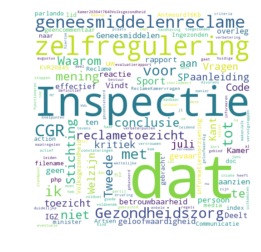

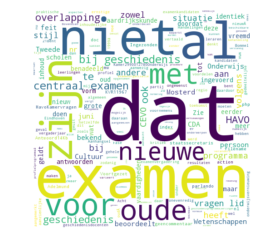

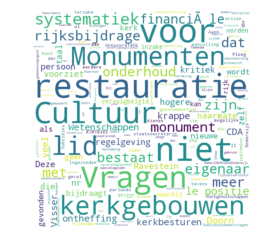

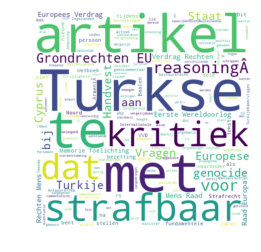

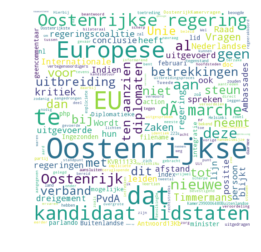

In [44]:
#Execute the query search
query = input()
results = querysearch(query)
print("Here is a wordweb of each results: ")
for hit in results:
    makeWordweb(hit)

In [37]:
def makeTimeline(results):
    time_line = {}
    for hit in results:
        date = hit["_source"]["Datum_indiening"]
        split_date = date.split("-")
        if split_date[0] in time_line:
            time_line[split_date[0]] +=1
        else:
            time_line[split_date[0]] = 1

    dates = []
    frequencies = []
    for date in time_line:
        dates.append(int(date))
        frequencies.append(int(time_line[date]))
    plt.bar(dates, frequencies, 0.5)
    plt.show()

kritiek
Got 5 Hits:
Here are the first 5
Vraag 1: Wat is uw reactie op de kritiek van de Inspectie voor de Gezondheidszorg op de Stichting Code Geneesmiddelenreclame (CGR)? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR20845

Vraag 2: Bent u bekend met het feit dat geschiedenisdocenten aanwezig op de VGN examenvergadering in onder andere de regio Eindhoven ernstige kritiek hebben geuit op het HAVO geschiedenis examen 2000? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR11967

Vraag 3: Hoe beoordeelt u de kritiek van de wetenschapswinkel economie van de rijksuniversiteit Groningen op de systematiek die voorziet in een hogere rijksbijdrage naarmate de eigenaar van een monument zelf meer bijdraagt, gegeven de krappe financiÃ«le positie van veel kerkbesturen? 

http://www.geencommentaar.nl/parlando/index.php?action=doc&filename=KVR10345

Vraag 4: Bent u op de hoogte van het feit dat kritiek op de Turkse bezetting van Noord-Cyprus en erke

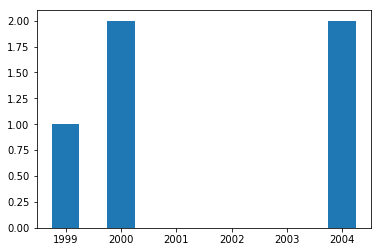

In [39]:
#Execute the query search
query = input()
results = querysearch(query)
print("Here is a timeline of the results: ")
makeTimeline(results)

In [62]:
# Example from https://www.elastic.co/guide/en/elasticsearch/guide/current/_search_lite.html
# GET /megacorp/employee/_search?q=last_name:Smith
# View the query in sense to see the specific JSON way of writing it

q= {
  "query": {
    "match": {
      "last_name": "smith"
    }
  }
}
res = es.search(index="megacorp", body=q)
res

{'_shards': {'failed': 0, 'successful': 5, 'total': 5},
 'hits': {'hits': [{'_id': 'AWaq1gnu-PdPwzTgI-e4',
    '_index': 'megacorp',
    '_score': 1.0,
    '_source': {'about': 'I love to go rock climbing',
     'age': 25,
     'first_name': 'John',
     'interests': ['sports', 'music'],
     'last_name': 'Smith'},
    '_type': 'employee'},
   {'_id': '1',
    '_index': 'megacorp',
    '_score': 1.0,
    '_source': {'about': 'I love to go rock climbing',
     'age': 25,
     'first_name': 'John',
     'interests': ['sports', 'music'],
     'last_name': 'Smith'},
    '_type': 'employee'},
   {'_id': 'AWaq1fp7-PdPwzTgI-e2',
    '_index': 'megacorp',
    '_score': 1.0,
    '_source': {'about': 'I love to go rock climbing',
     'age': 25,
     'first_name': 'John',
     'interests': ['sports', 'music'],
     'last_name': 'Smith'},
    '_type': 'employee'}],
  'max_score': 1.0,
  'total': 3},
 'timed_out': False,
 'took': 6}

In [49]:
# res is a dict
res['hits']['hits']

[{'_id': 'AWaq1gnu-PdPwzTgI-e4',
  '_index': 'megacorp',
  '_score': 1.0,
  '_source': {'about': 'I love to go rock climbing',
   'age': 25,
   'first_name': 'John',
   'interests': ['sports', 'music'],
   'last_name': 'Smith'},
  '_type': 'employee'},
 {'_id': '1',
  '_index': 'megacorp',
  '_score': 1.0,
  '_source': {'about': 'I love to go rock climbing',
   'age': 25,
   'first_name': 'John',
   'interests': ['sports', 'music'],
   'last_name': 'Smith'},
  '_type': 'employee'},
 {'_id': 'AWaq1fp7-PdPwzTgI-e2',
  '_index': 'megacorp',
  '_score': 1.0,
  '_source': {'about': 'I love to go rock climbing',
   'age': 25,
   'first_name': 'John',
   'interests': ['sports', 'music'],
   'last_name': 'Smith'},
  '_type': 'employee'}]

In [51]:
# score of first hit 
res['hits']['hits'][0]['_score']

1.0

# Bulk indexing

If you index a lot of documents you need to use the bulk index methods.

See 
* <https://www.elastic.co/guide/en/elasticsearch/guide/current/bulk.html> for the explanation in the guide
* <http://unroutable.blogspot.nl/2015/03/quick-example-elasticsearch-bulk-index.html> for the Python way

In [50]:
>>> import itertools
>>> import string
>>> from elasticsearch import  helpers
 
>>> # k is a generator expression that produces
... # a series of dictionaries containing test data.
... # The test data are just letter permutations
... # created with itertools.permutations.
... #
... # We then reference k as the iterator that's
... # consumed by the elasticsearch.helpers.bulk method.
>>> k = ({'_type':'foo', '_index':'test2','letters':''.join(letters)}
...      for letters in itertools.permutations(string.letters,2))

>>> # calling k.next() shows examples
... # (while consuming the generator, of course)
>>> # each dict contains a doc type, index, and data (at minimum)
>>> k.next()

AttributeError: module 'string' has no attribute 'letters'

In [73]:
# What is this k generator?

letters=  [letters for letters in itertools.permutations(string.letters,4)]

len(letters),letters[:5]

(6497400,
 [('A', 'B', 'C', 'D'),
  ('A', 'B', 'C', 'E'),
  ('A', 'B', 'C', 'F'),
  ('A', 'B', 'C', 'G'),
  ('A', 'B', 'C', 'H')])

In [66]:
k.next()

{'_index': 'test2', '_type': 'foo', 'letters': 'AC'}

In [64]:
>>> # create our test index
>>> es.indices.create('test2')

{u'acknowledged': True}

In [67]:

>>> helpers.bulk(es,k)

(2650, [])

In [68]:
>>> # check to make sure we got what we expected...
>>> es.count(index='test')

{u'_shards': {u'failed': 0, u'successful': 5, u'total': 5}, u'count': 2651}

# Your turn
* Make quite a bit more documents by changing the 2 in the definition of k to 3, or 4...
* index them again and query, and notice performance
* find out how you can delete an index ;-)